# Load packages

In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(ggpubr)
library(ggprism)
library(MAST)
library(readr)
library(RColorBrewer)
library(scales)
library(rstatix)
library(googlesheets4)
source("/diskmnt/Projects/Users/Evan.p/scripts/Rscript/jupyter_support_functions.R")

Loading required package: SeuratObject

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, saveRDS


Loading Seurat v5 beta version 
To maintain compatibility with previous workflows, new Seurat objects will use the previous object structure by default
To use new Seurat v5 assays: Please run: options(Seurat.object.assay.version = 'v5')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


# Load objects

In [2]:
# setwd('/diskmnt/Projects/MetNet_analysis_2/Colorectal/snMultiome/rds_objects/cell_types_subset/epithelial')
# epithelial_reint = readRDS('57_Integrated_normalized_mCRC_snRNA_noDB_v7_epithelial_clean3_reINT.rds')
# epithelial_reint

setwd('/diskmnt/Projects/MetNet_analysis_2/Colorectal/snMultiome/rds_objects/cell_types_subset/RNA/epithelial')
epithelial_reint = readRDS('57_Integrated_normalized_mCRC_snRNA_noDB_v7_epithelial_clean5.rds')
epithelial_reint

An object of class Seurat 
71822 features across 225162 samples within 2 assays 
Active assay: RNA (36601 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: SCT
 8 dimensional reductions calculated: pca, umap.rna, integrated.scvi, mCRCv4_umap.scvi, mCRCv5_umap.scvi, mCRCv6_umap.scvi, epithelial_umap.scvi, epithelial_umap2.scvi

In [226]:
colnames(epithelial_reint@meta.data)

[1] "orig.ident"              "Patient_ID"             
 [3] "nCount_RNA"              "nFeature_RNA"           
 [5] "percent.mito"            "nCount_SCT"             
 [7] "nFeature_SCT"            "seurat_clusters"        
 [9] "S.Score"                 "G2M.Score"              
[11] "Phase"                   "SCT_snn_res.2"          
[13] "cell_type_RNA"           "cell_type_RNA_simple"   
[15] "Age"                     "Sex"                    
[17] "Site_of_Origin"          "Tissue_Type"            
[19] "Primary_Side"            "MSI"                    
[21] "MSI_score"               "Tx_in_6mo"              
[23] "scrublet_doublet"        "DF_doublet"             
[25] "cell_type_integrated"    "cell_type_simple"       
[27] "cell_type_integrated2"   "cell_type_simple2"      
[29] "mCRCv6_clusters_0.2"     "mCRCv6_clusters_0.4"    
[31] "mCRCv6_clusters_0.6"     "mCRCv6_clusters_0.8"    
[33] "mCRCv6_clusters_1"       "mCRCv6_clusters_1.2"    
[35] "mCRCv6_clusters_1.4"     "mCRCv6_clusters_1.6"    
[37] "mCRCv6_clusters_1.8"     "mCRCv6_clusters_2"      
[39] "cell_type_simple3"       "cell_type_integrated3"  
[41] "epithelial_clusters_0.1" "APC_mutation"           
[43] "KRAS_mutation"           "TP53_mutation"          
[45] "APC_mut"                 "KRAS_mut"               
[47] "TP53_mut"                "epithelial_cluster_sub6"
[49] "epi_clusters_0.1"        "epithelial_cluster_sub0"
[51] "epithelial_cluster_sub2" "epithelial_cluster_sub3"
[53] "epi_cell_type"

In [230]:
unique(epithelial_reint$Site_of_Origin)

[1] "liver"   "spleen"  "breast"  "colon"   "lung"    "rectum"  "adrenal"
[8] "brain"

In [225]:
head(epithelial_reint@meta.data, 3)

orig.ident Patient_ID nCount_RNA nFeature_RNA
HT112C1-T1_AAACCAACAGTTTCTC-1 HT112C1-T1 HT112C1     7056      3049        
HT112C1-T1_AAACCGCGTGCGCAAT-1 HT112C1-T1 HT112C1     9842      4221        
HT112C1-T1_AAACCGCGTTAACGAT-1 HT112C1-T1 HT112C1    10719      4441        
                              percent.mito nCount_SCT nFeature_SCT
HT112C1-T1_AAACCAACAGTTTCTC-1 0.001275510  3127       1966        
HT112C1-T1_AAACCGCGTGCGCAAT-1 0.018288966  2752       1849        
HT112C1-T1_AAACCGCGTTAACGAT-1 0.001119507  2816       1925        
                              seurat_clusters S.Score    G2M.Score   ⋯
HT112C1-T1_AAACCAACAGTTTCTC-1 2               -0.1390377 -0.07635363 ⋯
HT112C1-T1_AAACCGCGTGCGCAAT-1 1                0.4241602  0.30120090 ⋯
HT112C1-T1_AAACCGCGTTAACGAT-1 1                0.4051472  0.24396604 ⋯
                              TP53_mutation APC_mut KRAS_mut TP53_mut
HT112C1-T1_AAACCAACAGTTTCTC-1 NA            NA      NA       NA      
HT112C1-T1_AAACCGCGTGCGCAAT-1 NA            NA      NA       NA      
HT112C1-T1_AAACCGCGTTAACGAT-1 NA            NA      NA       NA      
                              epithelial_cluster_sub6 epi_clusters_0.1
HT112C1-T1_AAACCAACAGTTTCTC-1 0_0                     2               
HT112C1-T1_AAACCGCGTGCGCAAT-1 1_0                     1               
HT112C1-T1_AAACCGCGTTAACGAT-1 1_0                     1               
                              epithelial_cluster_sub0 epithelial_cluster_sub2
HT112C1-T1_AAACCAACAGTTTCTC-1 2                       2_0                    
HT112C1-T1_AAACCGCGTGCGCAAT-1 1                       1                      
HT112C1-T1_AAACCGCGTTAACGAT-1 1                       1                      
                              epithelial_cluster_sub3 epi_cell_type      
HT112C1-T1_AAACCAACAGTTTCTC-1 2_0                     APCDD1+ tumor      
HT112C1-T1_AAACCGCGTGCGCAAT-1 1                       Proliferative tumor
HT112C1-T1_AAACCGCGTTAACGAT-1 1                       Proliferative tumor

In [ ]:
epithelial_reint

# Variant mapping

In [3]:
wxs_epithelial <- subset(epithelial_reint, 
                         subset = (orig.ident == 'CM268C1-S1' | orig.ident == 'CM268C1-T1' | orig.ident == 'CM354C1-T1' |
                                   orig.ident == 'CM354C2-T1' | orig.ident == 'CM268C1-T1' | orig.ident == 'CM392C1-S1' |
                                   orig.ident == 'CM392C2-Th1' | orig.ident == 'CM426C1-Th1' | orig.ident == 'CM426C2-Tp1' |
                                   orig.ident == 'CM478C1-T1Y2' | orig.ident == 'HT213C1-Te1' | orig.ident == 'HT225C1-Th1' |
                                   orig.ident == 'HT230C1-Th1' | orig.ident == 'HT253C1-Th1' | orig.ident == 'HT260C1-Th1' |
                                   orig.ident == 'HT266C1-Tb1'))

png 
  2

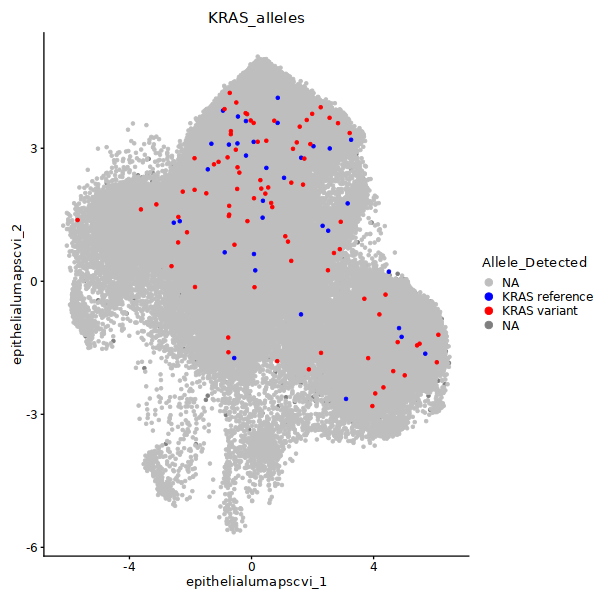

In [4]:
p <- DimPlot(wxs_epithelial, group.by = "KRAS_mut", reduction = "epithelial_umap.scvi", order = T, label=F, pt.size=1, label.size=6, raster=FALSE) +
    labs(title = "KRAS_alleles", color="Allele_Detected") + 
    scale_color_manual(labels = c("NA", "KRAS reference", "KRAS variant"), values = c("grey", "blue", "red"))
pdf('KRAS_alleles_umap.pdf', height = 6, width = 6)
p
dev.off()

set_size(6,6)
p

png 
  2

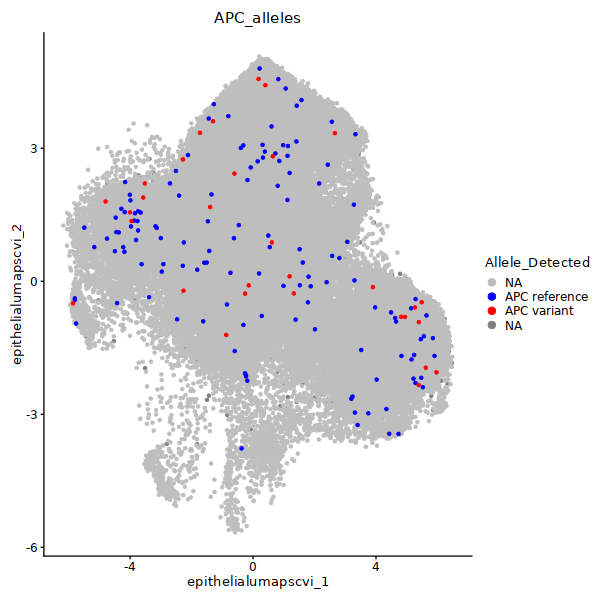

In [5]:
p <- DimPlot(wxs_epithelial, group.by = "APC_mut", reduction = "epithelial_umap.scvi", order = T, label=F, pt.size=1, label.size=6, raster=FALSE) +
    labs(title = "APC_alleles", color="Allele_Detected") + 
    scale_color_manual(labels = c("NA", "APC reference", "APC variant"), values = c("grey", "blue", "red"))
pdf('APC_alleles_umap.pdf', height = 6, width = 6)
p
dev.off()

set_size(6,6)
p

png 
  2

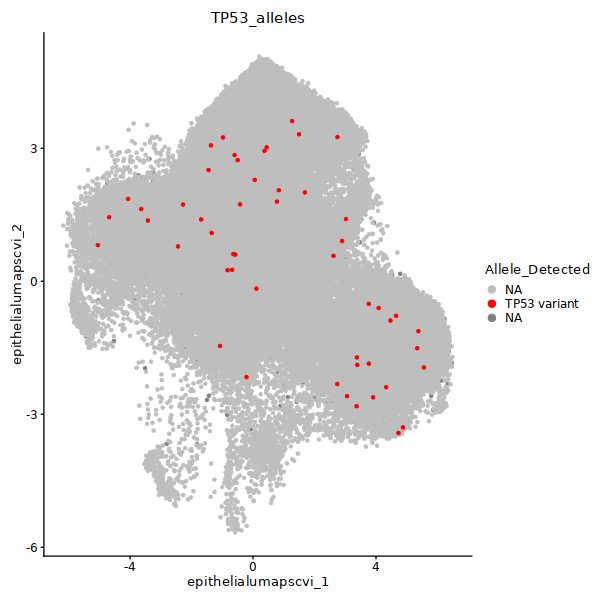

In [6]:
p <- DimPlot(wxs_epithelial, group.by = "TP53_mut", reduction = "epithelial_umap.scvi", order = T, label=F, pt.size=1, label.size=6, raster=FALSE) +
    labs(title = "TP53_alleles", color="Allele_Detected") + 
    scale_color_manual(labels = c("NA", "TP53 variant"), values = c("grey", "red"))
pdf('TP53_alleles_umap.pdf', height = 6, width = 6)
p
dev.off()

set_size(6,6)
p

In [118]:
colnames(wxs_epithelial@meta.data)

[1] "orig.ident"              "Patient_ID"             
 [3] "nCount_RNA"              "nFeature_RNA"           
 [5] "percent.mito"            "nCount_SCT"             
 [7] "nFeature_SCT"            "seurat_clusters"        
 [9] "S.Score"                 "G2M.Score"              
[11] "Phase"                   "SCT_snn_res.2"          
[13] "cell_type_RNA"           "cell_type_RNA_simple"   
[15] "Age"                     "Sex"                    
[17] "Site_of_Origin"          "Tissue_Type"            
[19] "Primary_Side"            "MSI"                    
[21] "MSI_score"               "Tx_in_6mo"              
[23] "scrublet_doublet"        "DF_doublet"             
[25] "cell_type_integrated"    "cell_type_simple"       
[27] "cell_type_integrated2"   "cell_type_simple2"      
[29] "mCRCv6_clusters_0.2"     "mCRCv6_clusters_0.4"    
[31] "mCRCv6_clusters_0.6"     "mCRCv6_clusters_0.8"    
[33] "mCRCv6_clusters_1"       "mCRCv6_clusters_1.2"    
[35] "mCRCv6_clusters_1.4"     "mCRCv6_clusters_1.6"    
[37] "mCRCv6_clusters_1.8"     "mCRCv6_clusters_2"      
[39] "cell_type_simple3"       "cell_type_integrated3"  
[41] "epithelial_clusters_0.1" "APC_mutation"           
[43] "KRAS_mutation"           "TP53_mutation"          
[45] "APC_mut"                 "KRAS_mut"               
[47] "TP53_mut"                "epithelial_cluster_sub6"

# Cell Type Annotation

 ### Nature volume 619, pages572–584 (2023)
- BEST4+ enterocytes (BEST4, OTOP2), 
- goblet cells (MUC2, TFF1, SYTL2), 
- immature goblet cells (KLK1, RETNLB, CLCA1), 
- stem cells (RGMB, SMOC2, LGR5, ASCL2), 
- tuft cells (SH2D6, TRPM5, BMX, LRMP, HCK), 
- enteroendocrine cells (SCGN, FEV, CHGA, PYY, GCG), 
- cycling transit-amplifying cells (TICRR, CDC25C),
- Paneth cells (LYZ, DEFA5)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



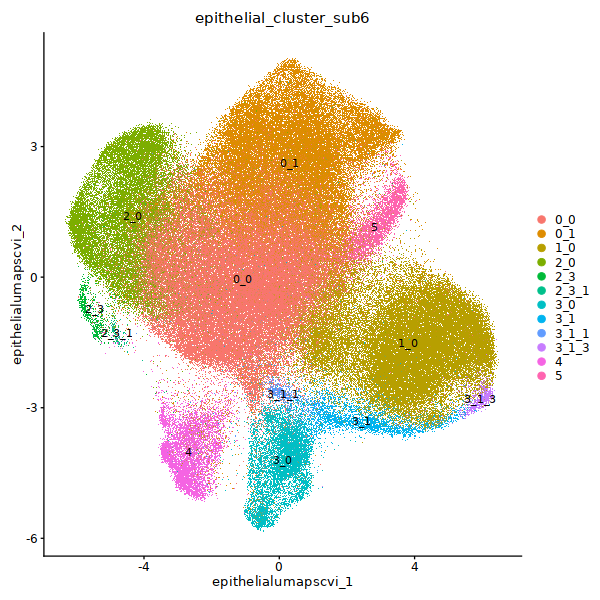

In [10]:
set_size(6,6)
p1 = DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'epithelial_cluster_sub6', label = TRUE)
p1

## goblet cells (MUC2, TFF1, SYTL2)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



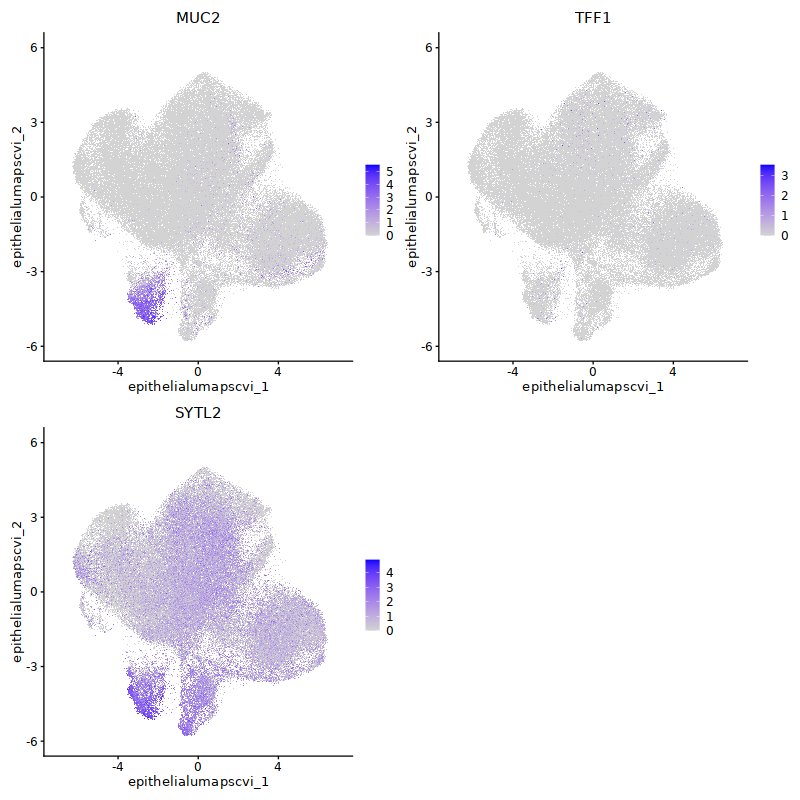

In [11]:
set_size(8,8)
FeaturePlot(epithelial_reint, features = c('MUC2', 'TFF1', 'SYTL2'), reduction = 'epithelial_umap.scvi')

## immature goblet cells (KLK1, RETNLB, CLCA1)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



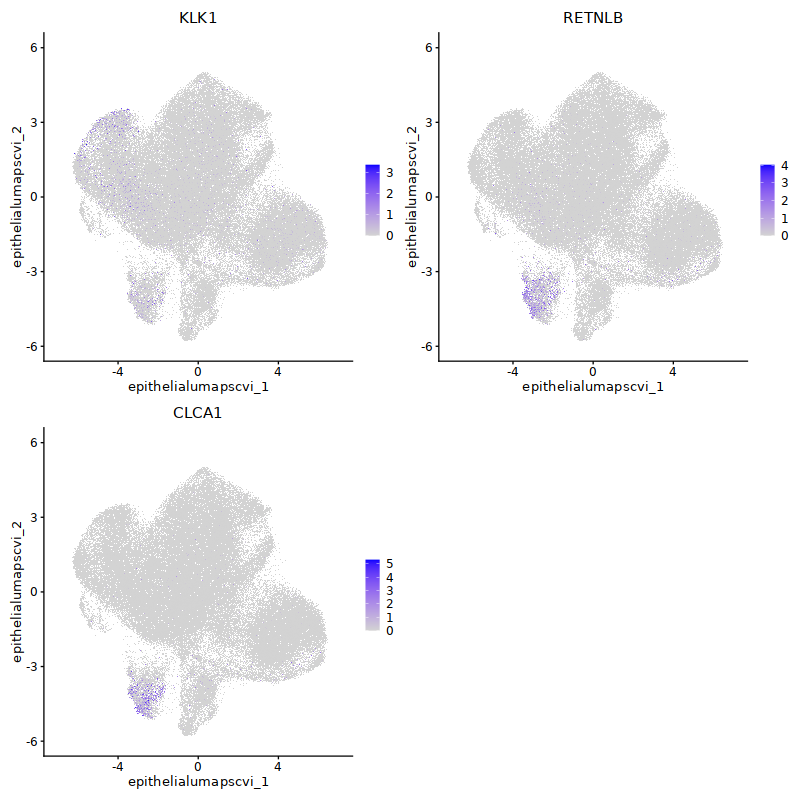

In [12]:
set_size(8,8)
FeaturePlot(epithelial_reint, features = c('KLK1', 'RETNLB', 'CLCA1'), reduction = 'epithelial_umap.scvi')

## stem cells (RGMB, SMOC2, LGR5, ASCL2)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



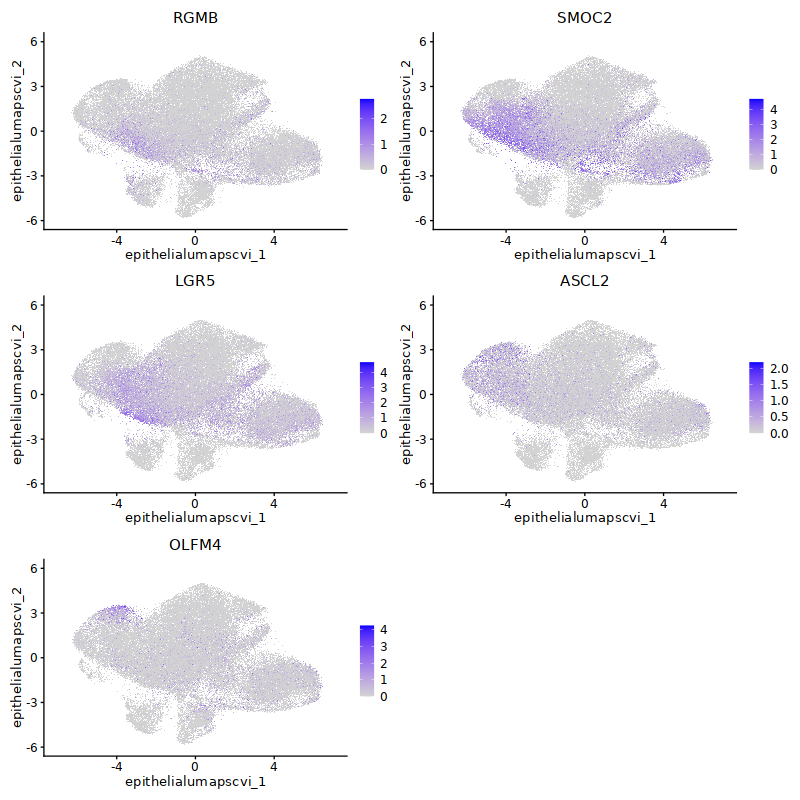

In [560]:
set_size(8,8)
FeaturePlot(epithelial_reint, features = c('RGMB', 'SMOC2', 'LGR5', 'ASCL2', 'OLFM4'), reduction = 'epithelial_umap.scvi')

## tuft cells (SH2D6, TRPM5, BMX, LRMP, HCK)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



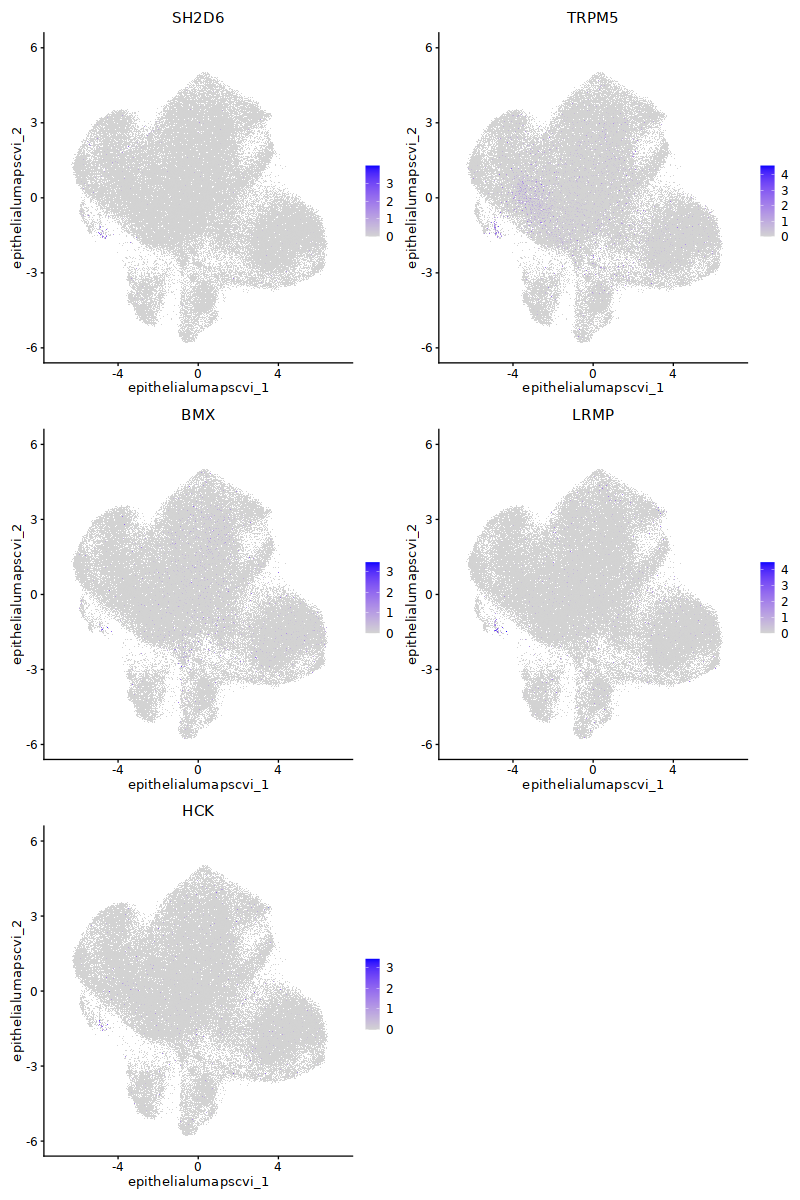

In [14]:
set_size(8,12)
FeaturePlot(epithelial_reint, features = c('SH2D6', 'TRPM5', 'BMX', 'LRMP', 'HCK'), reduction = 'epithelial_umap.scvi')

## enteroendocrine cells (SCGN, FEV, CHGA, PYY, GCG)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



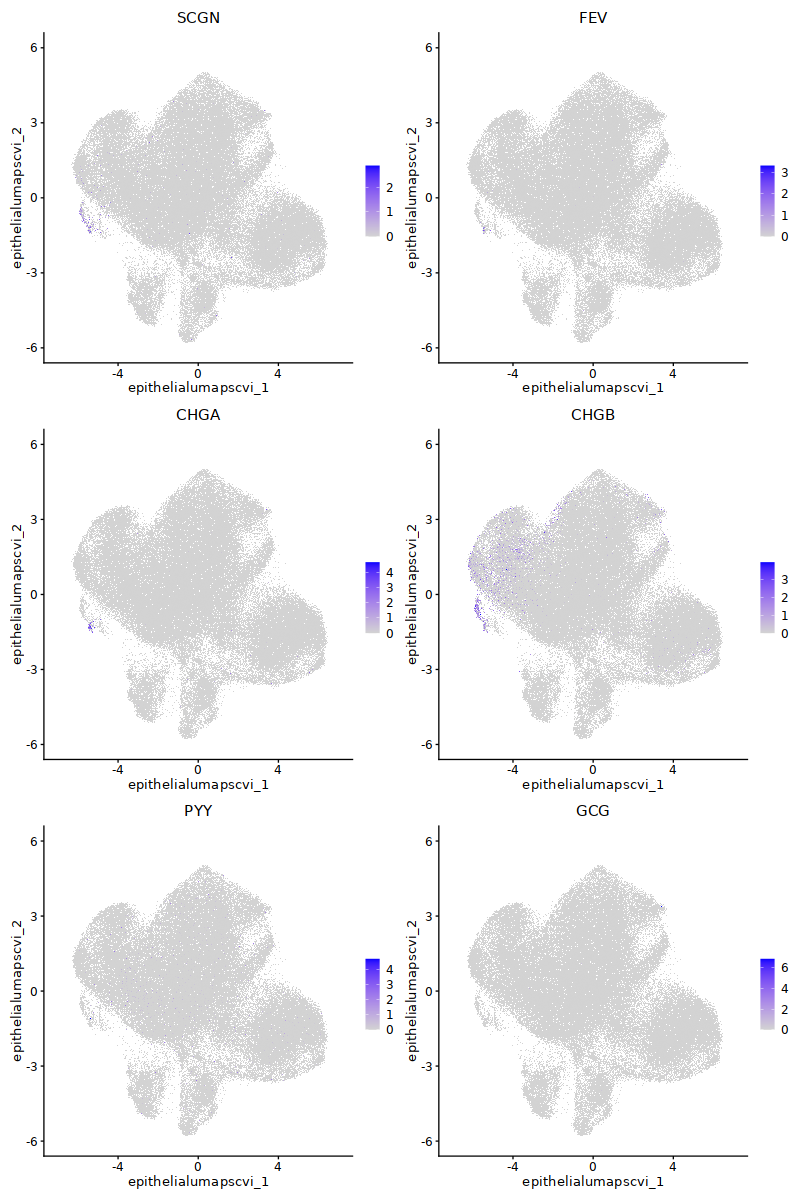

In [15]:
set_size(8,12)
FeaturePlot(epithelial_reint, features = c('SCGN', 'FEV', 'CHGA', 'CHGB', 'PYY', 'GCG'), reduction = 'epithelial_umap.scvi')

## cycling transit-amplifying cells (TICRR, CDC25C)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



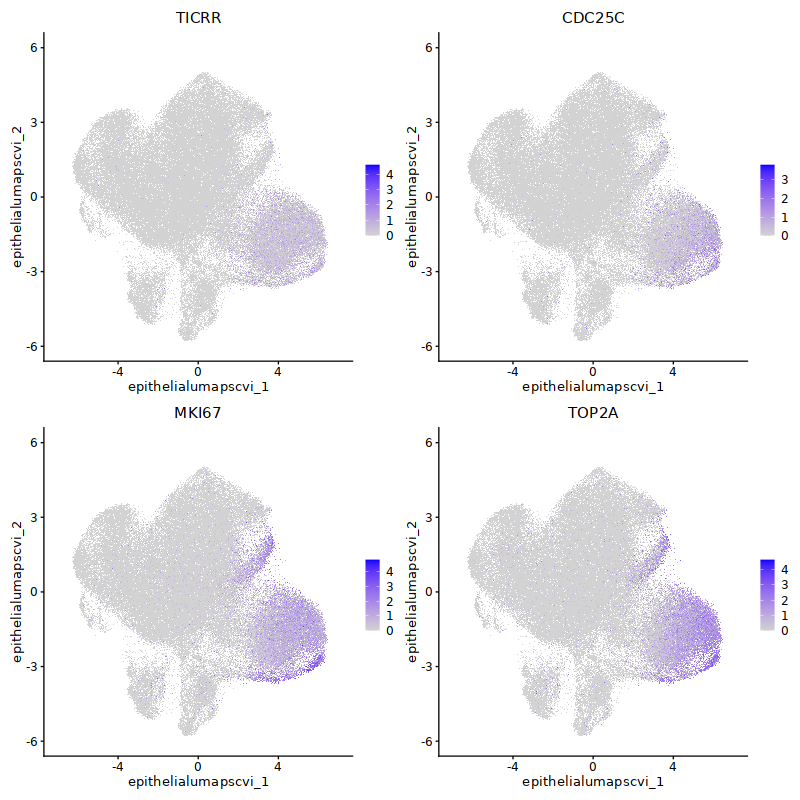

In [16]:
set_size(8,8)
FeaturePlot(epithelial_reint, features = c('TICRR', 'CDC25C', 'MKI67', 'TOP2A'), reduction = 'epithelial_umap.scvi')

## Paneth cells (LYZ, DEFA5)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



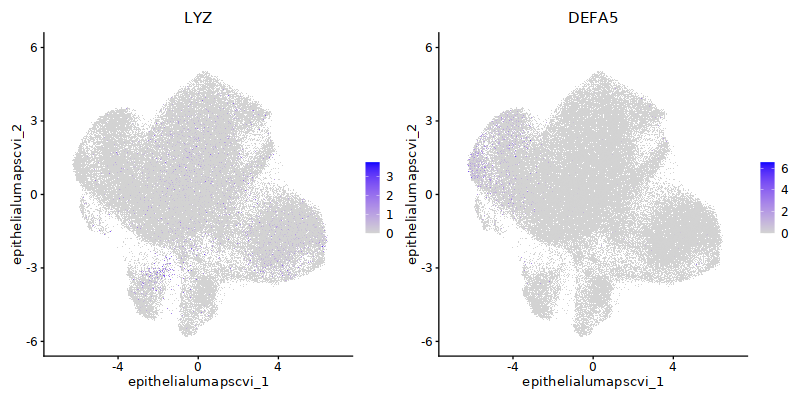

In [17]:
set_size(8,4)
FeaturePlot(epithelial_reint, features = c('LYZ', 'DEFA5'), reduction = 'epithelial_umap.scvi')

## angeiogenic tumor cells

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



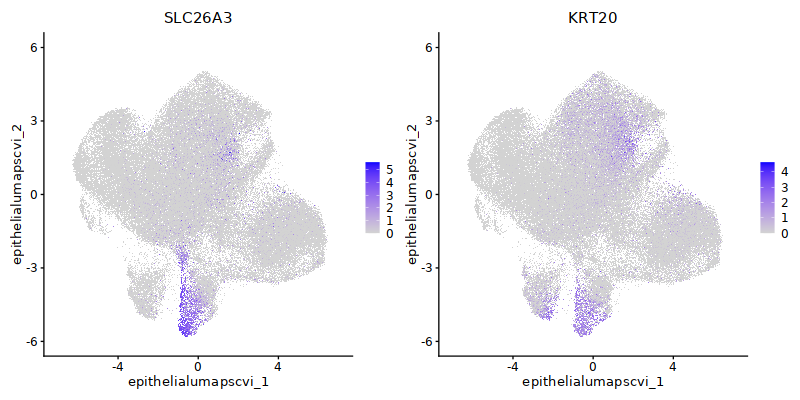

In [5]:
set_size(8,4)
FeaturePlot(epithelial_reint, features = c('SLC26A3', 'KRT20'), reduction = 'epithelial_umap.scvi')

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



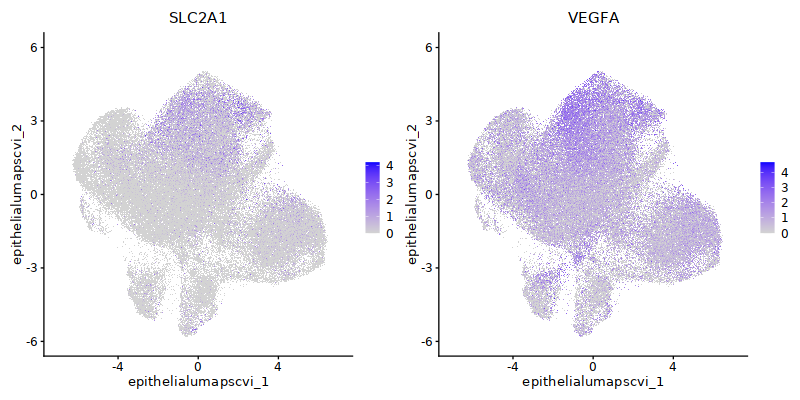

In [18]:
set_size(8,4)
FeaturePlot(epithelial_reint, features = c('SLC2A1', 'VEGFA'), reduction = 'epithelial_umap.scvi')

## Umaps

In [109]:
organ_col <- c(colon = 'sienna3', rectum = 'firebrick3', liver = 'brown', 
               lung = 'steelblue1', brain = 'bisque1', adrenal = 'cyan4', 
               breast = 'violet', spleen = 'lightcoral')
tissue_col <- c(primary = 'gold3', metastasis = 'maroon3', normal ='lightblue1')

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



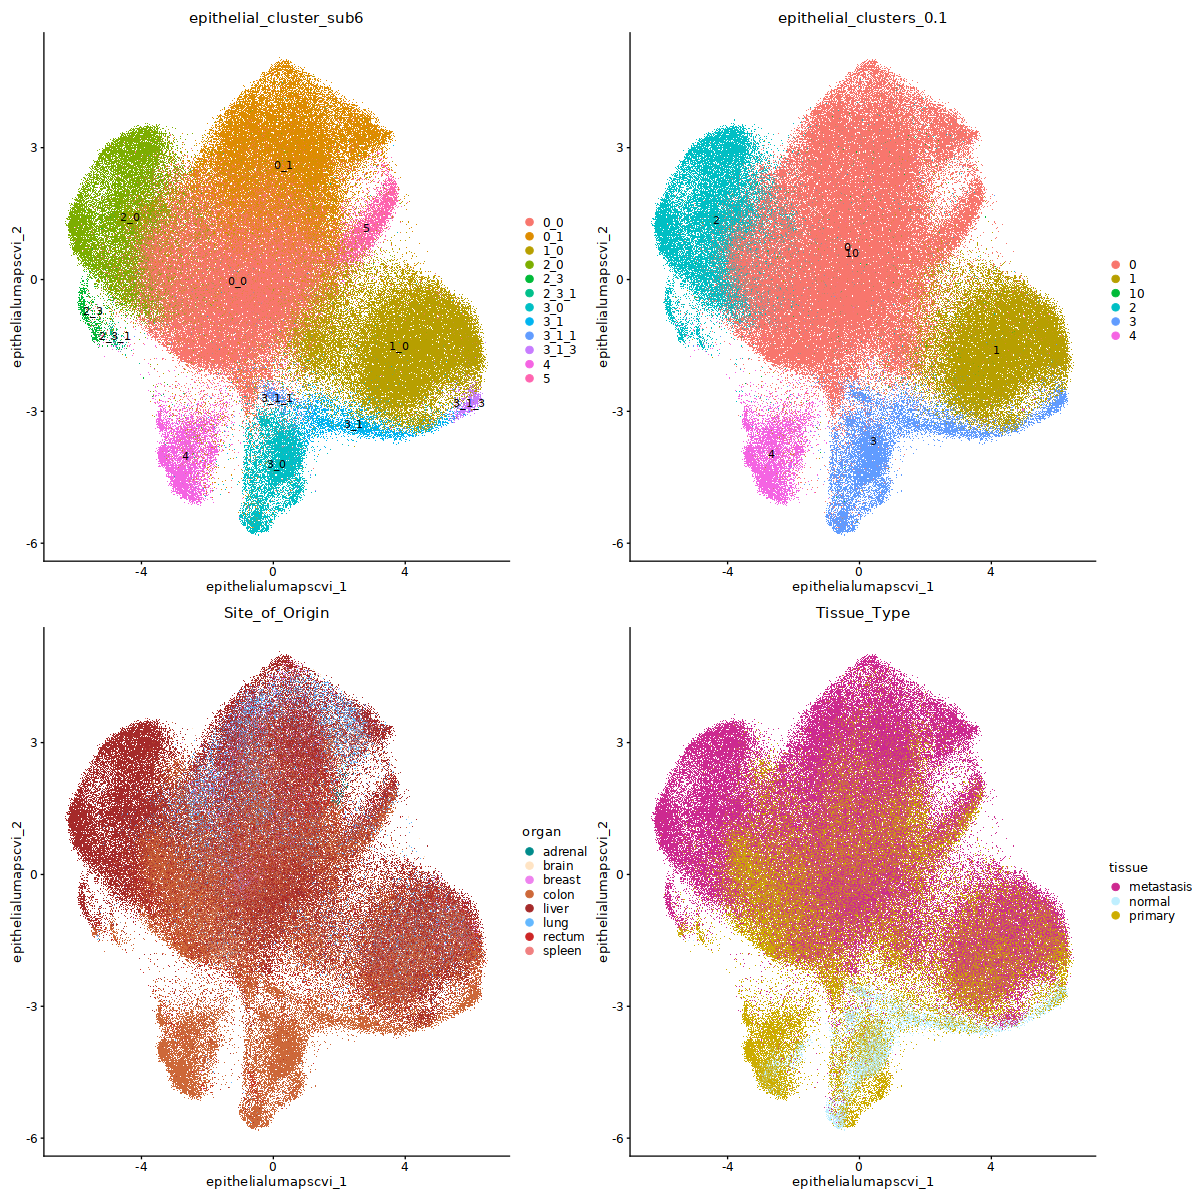

In [110]:
set_size(12,12)
p2 = DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'epithelial_clusters_0.1', label = TRUE)
p3 = DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'Site_of_Origin', 
             label=FALSE) + scale_color_manual(values=organ_col, name='organ')
p4 = DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'Tissue_Type', 
             label = FALSE) + scale_color_manual(values=tissue_col, name='tissue')
p1 + p2  + p3 + p4

In [111]:
pdf("Dimplot_mCRC_epithelial_organ.pdf", width=6, height=6)
print(p3)
dev.off()

pdf("Dimplot_mCRC_epithelial_tissue.pdf", width=6, height=6)
print(p4)
dev.off()

png 
  2

png 
  2

### map orig.ident

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



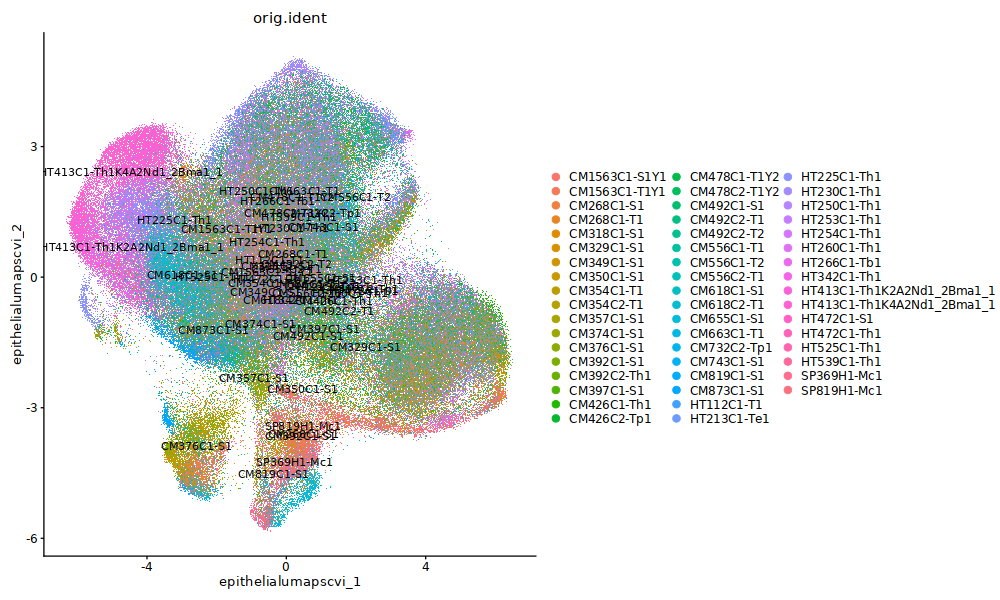

In [20]:
set_size(10,6)
p5 = DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'orig.ident', label = TRUE)
p5

In [114]:
pdf("Dimplot_mCRC_epithelial_samples.pdf", width=12, height=6)
print(p5)
dev.off()

png 
  2

### map MSI

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



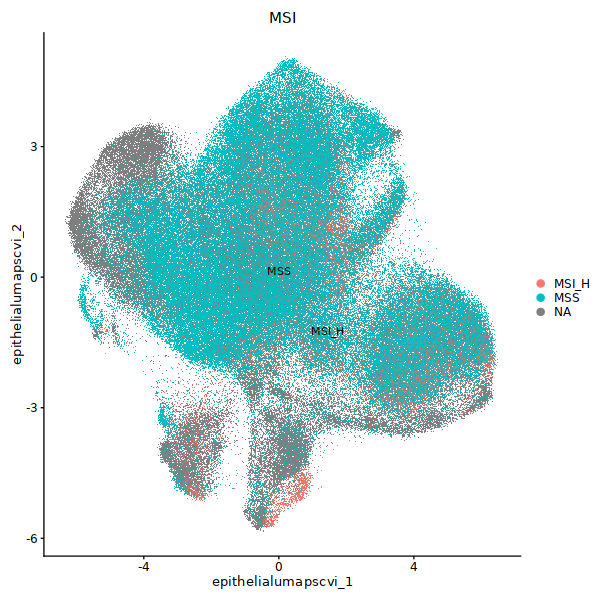

In [479]:
set_size(6,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'MSI', label = TRUE)

In [485]:
library(scCustomize)

scCustomize v1.1.1
If you find the scCustomize useful please cite.
See 'samuel-marsh.github.io/scCustomize/articles/FAQ.html' for citation info.



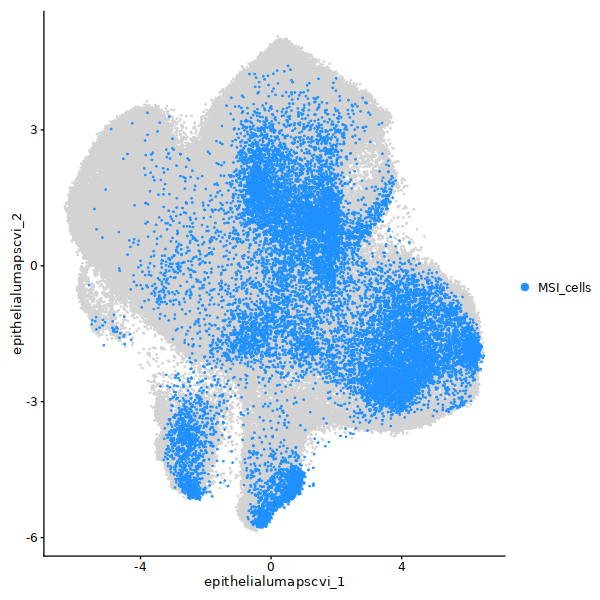

In [493]:
Idents(epithelial_reint) = 'MSI'
MSI_cells <- WhichCells(object = epithelial_reint, idents = 'MSI_H')
cells <- list(MSI_cells = MSI_cells)
Cell_Highlight_Plot(seurat_object = epithelial_reint,
                    reduction = 'epithelial_umap.scvi',
                    cells_highlight = cells, raster = FALSE)

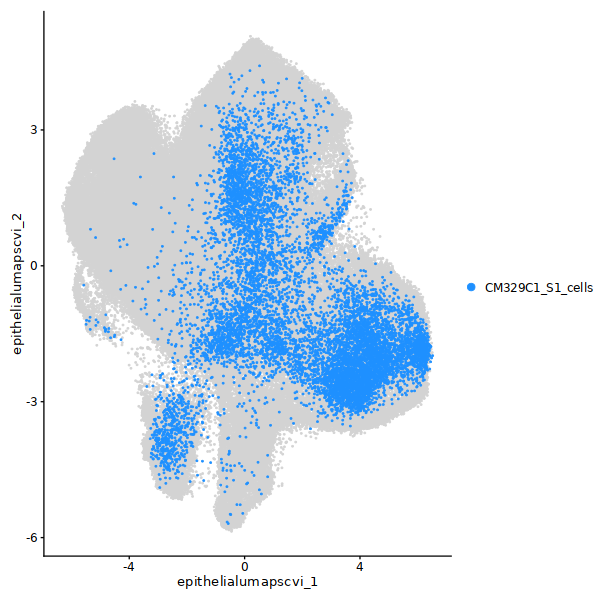

In [494]:
Idents(epithelial_reint) = 'orig.ident'
CM329C1_S1_cells <- WhichCells(object = epithelial_reint, idents = 'CM329C1-S1')
cells <- list(CM329C1_S1_cells = CM329C1_S1_cells)
Cell_Highlight_Plot(seurat_object = epithelial_reint,
                    reduction = 'epithelial_umap.scvi',
                    cells_highlight = cells, raster = FALSE)

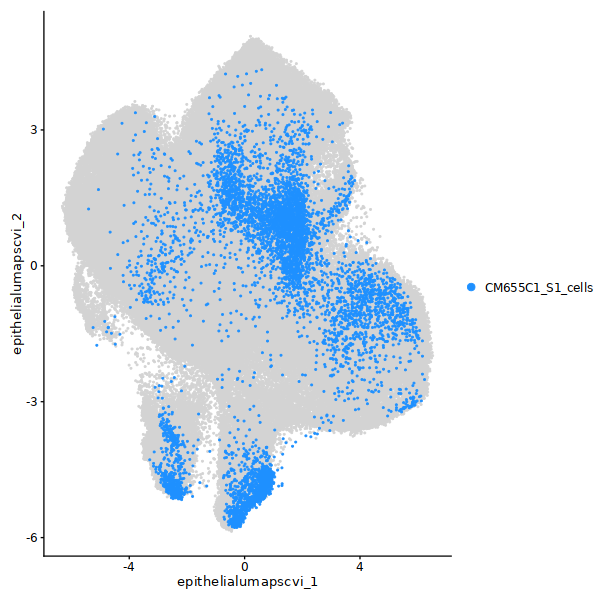

In [495]:
Idents(epithelial_reint) = 'orig.ident'
CM655C1_S1_cells <- WhichCells(object = epithelial_reint, idents = 'CM655C1-S1')
cells <- list(CM655C1_S1_cells = CM655C1_S1_cells)
Cell_Highlight_Plot(seurat_object = epithelial_reint,
                    reduction = 'epithelial_umap.scvi',
                    cells_highlight = cells, raster = FALSE)

In [ ]:
# MSI_H = CM329C1-S1, CM655C1-S1

## Cluster subset

### re-clustering with res 0.1 after removing clusters with extremely few cells

In [35]:
table(epithelial_reint$epithelial_clusters_0.1)


     0      1     10     11     12      2      3      4      5      6      7 
133401  41183    614      2      2  27898  14627   7964      2      2      2 
     8      9 
     2      2 

In [36]:
epithelial_reint <- epithelial_reint %>% 
                    subset(epithelial_clusters_0.1 == 0 |
                           epithelial_clusters_0.1 == 1 |
                           epithelial_clusters_0.1 == 10 |
                           epithelial_clusters_0.1 == 2 |
                           epithelial_clusters_0.1 == 3 |
                           epithelial_clusters_0.1 == 4 
                          ) 

In [37]:
epithelial_reint <- FindClusters(epithelial_reint, 
                                 resolution = 0.1, 
                                 cluster.name = 'epi_clusters_0.1', 
                                 graph = 'RNA_snn')

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 225687
Number of edges: 3193682

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9439
Number of communities: 618
Elapsed time: 60 seconds


612 singletons identified. 6 final clusters.

Warning message:
“Adding a command log without an assay associated with it”


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



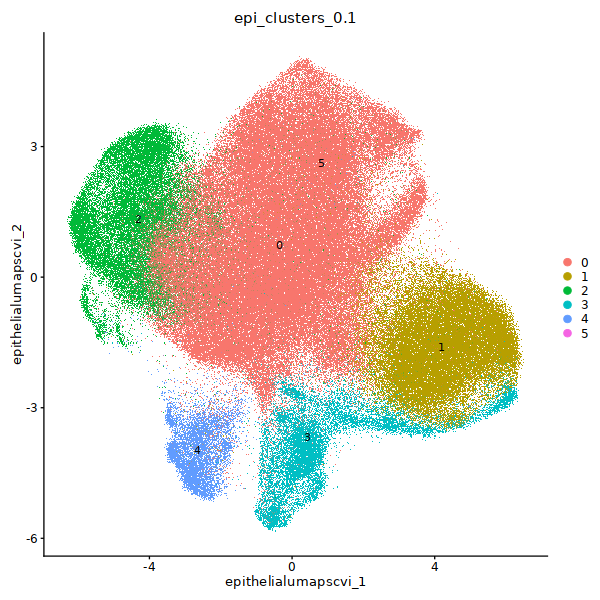

In [38]:
set_size(6,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'epi_clusters_0.1', label = TRUE)

In [41]:
table(epithelial_reint$epi_clusters_0.1)


     0      1      2      3      4      5 
134001  40659  28482  14604   7939      0 

In [39]:
epithelial_reint <- epithelial_reint %>% 
                    subset(epi_clusters_0.1 == 0 |
                           epi_clusters_0.1 == 1 |
                           epi_clusters_0.1 == 2 |
                           epi_clusters_0.1 == 3 |
                           epi_clusters_0.1 == 4 
                          ) 

### cluster 0: subclustering 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 134001
Number of edges: 1491364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9129
Number of communities: 4
Elapsed time: 23 seconds


[1] "2"   "1"   "0_0" "0_1" "0_2" "3"   "4"   "0_3"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



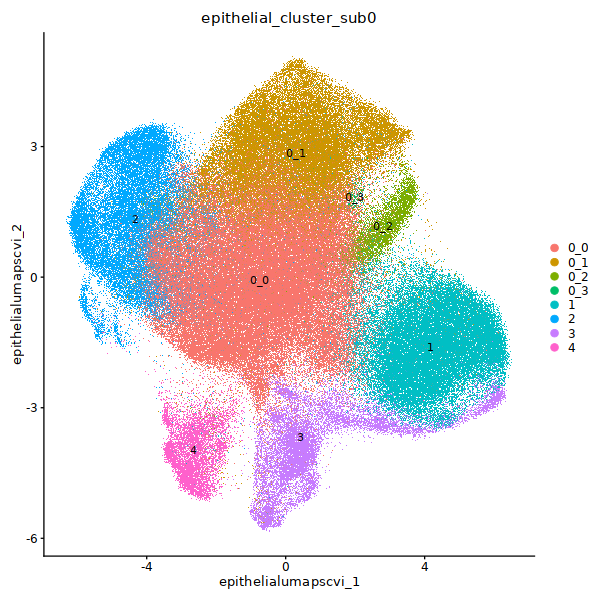

In [40]:
Idents(epithelial_reint) = "epi_clusters_0.1"
epithelial_reint = FindSubCluster(object = epithelial_reint,
                                  cluster = 0,
                                  graph.name = 'RNA_snn',
                                  subcluster.name = "epithelial_cluster_sub0",
                                  resolution = 0.1,
                                  algorithm = 1
                                  )
unique(epithelial_reint$epithelial_cluster_sub0)

set_size(6,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'epithelial_cluster_sub0', label = TRUE)

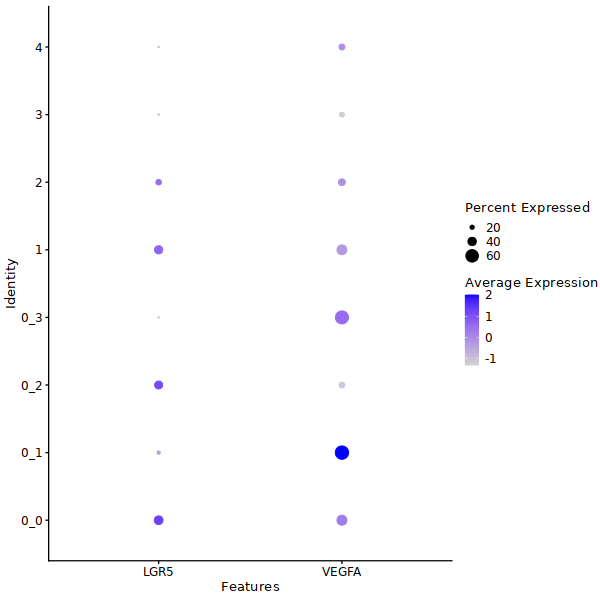

In [44]:
DotPlot(epithelial_reint, feature = c('LGR5', 'VEGFA'), group.by = 'epithelial_cluster_sub0')

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



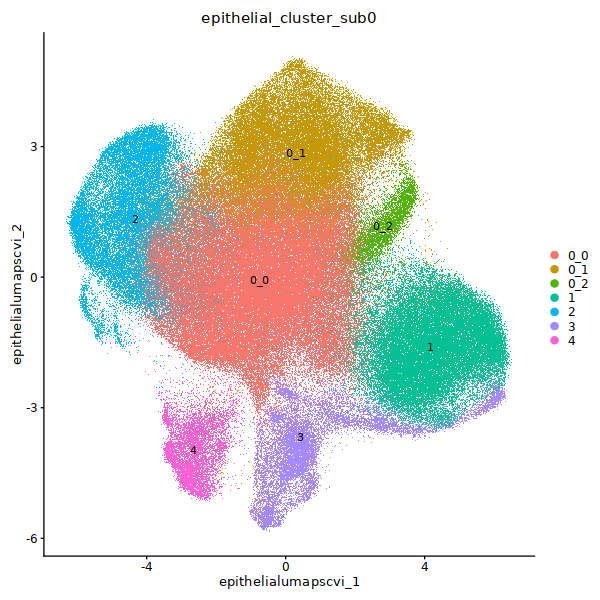

In [46]:
epithelial_reint@meta.data <- epithelial_reint@meta.data %>% 
                    mutate(epithelial_cluster_sub0 = case_when(epithelial_cluster_sub0 == '0_3' ~ '0_1',
                                                               TRUE ~ epithelial_cluster_sub0
                                                              ))

set_size(6,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'epithelial_cluster_sub0', label = TRUE)

### cluster 2: subclustering 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 28482
Number of edges: 449054

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9277
Number of communities: 616
Elapsed time: 3 seconds


612 singletons identified. 4 final clusters.



[1] "2_3" "1"   "0_0" "0_1" "0_2" "2_1" "2_0" "3"   "4"   "2_2"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



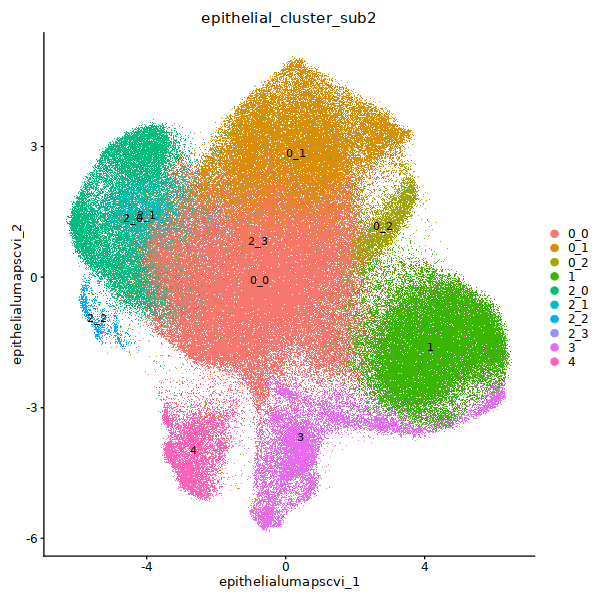

In [48]:
Idents(epithelial_reint) = "epithelial_cluster_sub0"
epithelial_reint = FindSubCluster(object = epithelial_reint,
                                  cluster = 2,
                                  graph.name = 'RNA_snn',
                                  subcluster.name = "epithelial_cluster_sub2",
                                  resolution = 0.1,
                                  algorithm = 1
                                  )
unique(epithelial_reint$epithelial_cluster_sub2)

set_size(6,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'epithelial_cluster_sub2', label = TRUE)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 920
Number of edges: 29791

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9335
Number of communities: 3
Elapsed time: 0 seconds


[1] "2_3"   "1"     "0_0"   "0_1"   "0_2"   "2_1"   "2_0"   "3"     "4"    
[10] "2_2_0" "2_2_1" "2_2_2"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



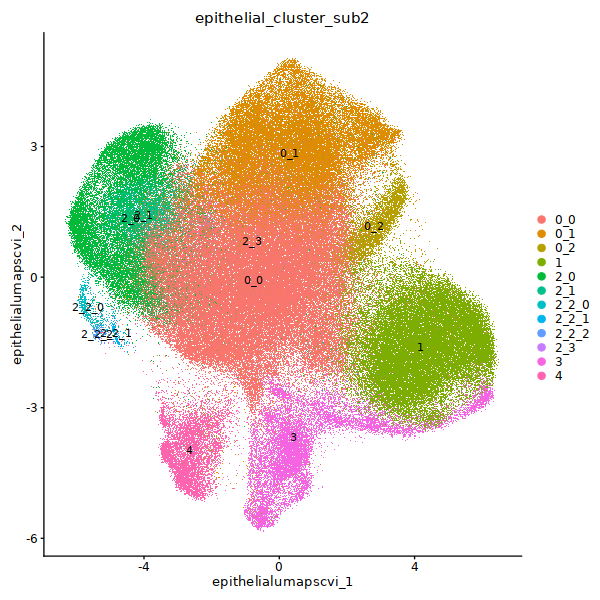

In [49]:
Idents(epithelial_reint) = "epithelial_cluster_sub2"
epithelial_reint = FindSubCluster(object = epithelial_reint,
                                  cluster = '2_2',
                                  graph.name = 'RNA_snn',
                                  subcluster.name = "epithelial_cluster_sub2",
                                  resolution = 0.1,
                                  algorithm = 1
                                  )
unique(epithelial_reint$epithelial_cluster_sub2)

set_size(6,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'epithelial_cluster_sub2', label = TRUE)

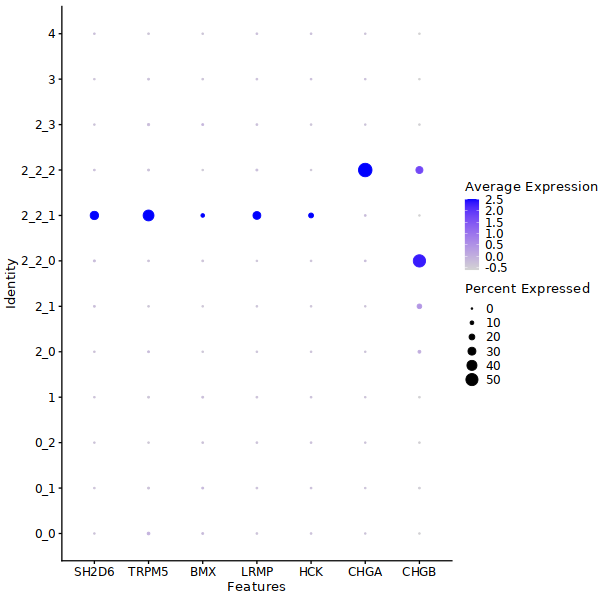

In [50]:
DotPlot(epithelial_reint, feature = c('SH2D6', 'TRPM5', 'BMX', 'LRMP', 'HCK', 'CHGA', 'CHGB'), 
        group.by = 'epithelial_cluster_sub2')

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


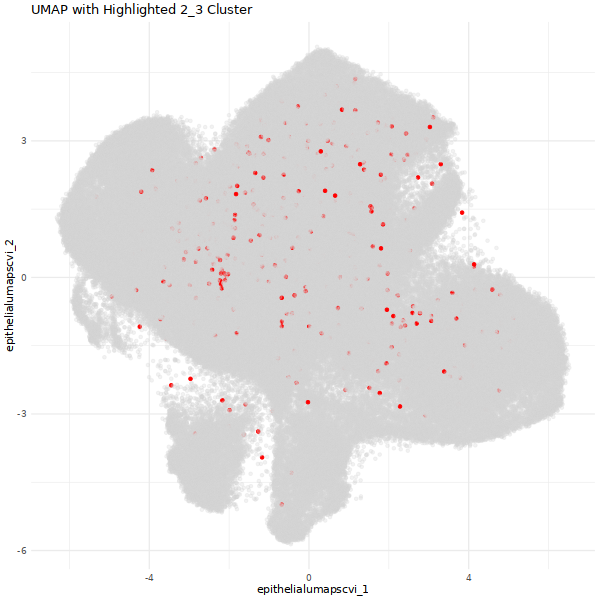

In [64]:
Highlight_Cluster_UMAP(seurat_object = epithelial_reint, 
                       metadata_column = 'epithelial_cluster_sub3', 
                       cell_type ='2_3', 
                       umap_reduction = 'epithelial_umap.scvi', 
                       highlight_color = "red")

In [65]:
Idents(epithelial_reint) = "epithelial_cluster_sub2"
epithelial_2_3_markers = FindMarkers(epithelial_reint,
                                     ident.1 = '2_3',
                                     min.pct=0.1, 
                                     logfc.threshold=0.5, 
                                     only.pos = TRUE, 
                                     return.thresh = 0.01,
                                     test.use = 'MAST')
write.csv(epithelial_2_3_markers,  "mCRC_epithelial_clean3_reINT_cluster2_3_markers_mast_deg.csv", row.names = TRUE)

Warning message in new_with_repaired_slots(classname = method, design = colData(sca), :
“Dropping illegal slot(s) return.thresh for class BayesGLMlike.  
                    This likely indicates a bug in an upstream package.”

 Completed [>-------------------------------------------]   2% with 0 failures

 Completed [=>------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   5% with 0 failures

 Completed [=>------------------------------------------]   6% with 0 failures

 Completed [==>-----------------------------------------]   7% with 0 failures

 Completed [===>----------------------------------------]   8% with 0 failures

 Completed [===>----------------------------------------]   9% with 0 failures

 Completed [===>----------------------------------------]  10% with 0 failures

 Completed [====>---------------------------------------]  11% with 0 failures

 Completed [=====>----------------------------------

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



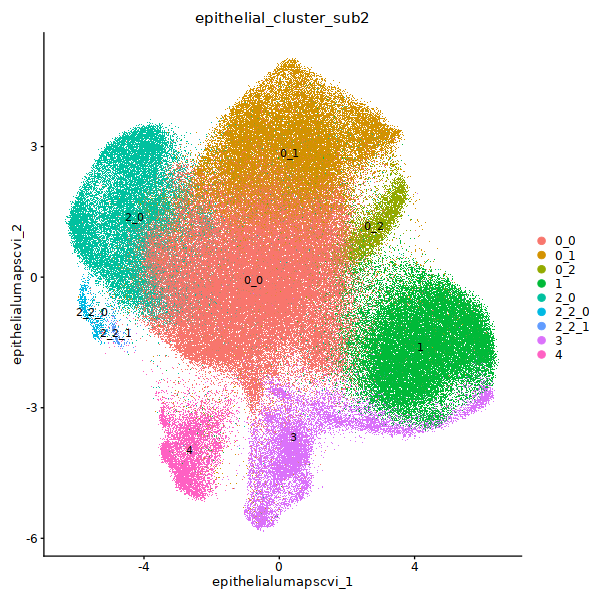

In [66]:
epithelial_reint@meta.data <- epithelial_reint@meta.data %>% 
                    mutate(epithelial_cluster_sub2 = case_when(epithelial_cluster_sub2 == '2_1' ~ '2_0',
                                                               epithelial_cluster_sub2 == '2_3' ~ '2_0',
                                                               epithelial_cluster_sub2 == '2_2_2' ~ '2_2_0',
                                                               TRUE ~ epithelial_cluster_sub2
                                                              ))

set_size(6,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'epithelial_cluster_sub2', label = TRUE)

### cluster 3: subclustering 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14604
Number of edges: 389256

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9304
Number of communities: 2
Elapsed time: 1 seconds


[1] "2_0"   "1"     "0_0"   "0_1"   "0_2"   "3_0"   "3_1"   "4"     "2_2_0"
[10] "2_2_1"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



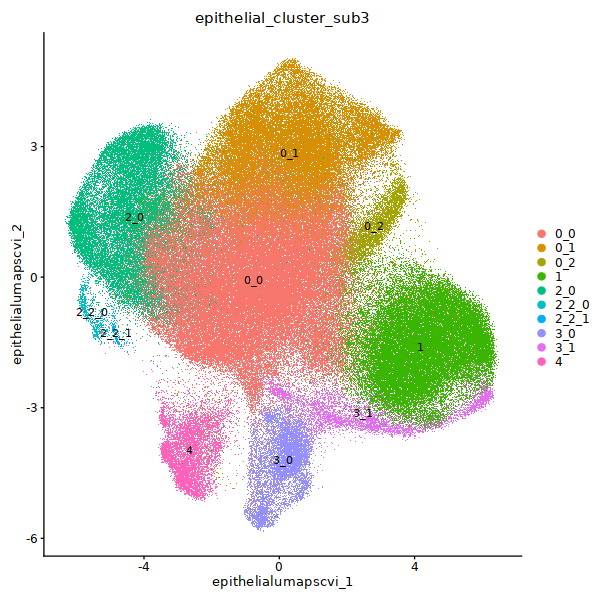

In [67]:
Idents(epithelial_reint) = "epithelial_cluster_sub2"
epithelial_reint = FindSubCluster(object = epithelial_reint,
                                  cluster = 3,
                                  graph.name = 'RNA_snn',
                                  subcluster.name = "epithelial_cluster_sub3",
                                  resolution = 0.1,
                                  algorithm = 1
                                  )
unique(epithelial_reint$epithelial_cluster_sub3)

set_size(6,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'epithelial_cluster_sub3', label = TRUE)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5407
Number of edges: 136375

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8825
Number of communities: 4
Elapsed time: 0 seconds


[1] "2_0"   "1"     "0_0"   "0_1"   "0_2"   "3_0"   "3_1_1" "4"     "3_1_0"
[10] "2_2_0" "2_2_1" "3_1_2" "3_1_3"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



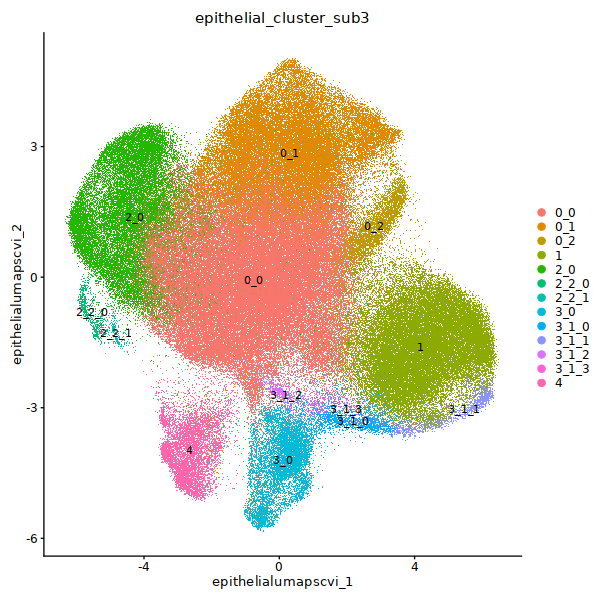

In [68]:
Idents(epithelial_reint) = "epithelial_cluster_sub3"
epithelial_reint = FindSubCluster(object = epithelial_reint,
                                  cluster = '3_1',
                                  graph.name = 'RNA_snn',
                                  subcluster.name = "epithelial_cluster_sub3",
                                  resolution = 0.2,
                                  algorithm = 1
                                  )
unique(epithelial_reint$epithelial_cluster_sub3)

set_size(6,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'epithelial_cluster_sub3', label = TRUE)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



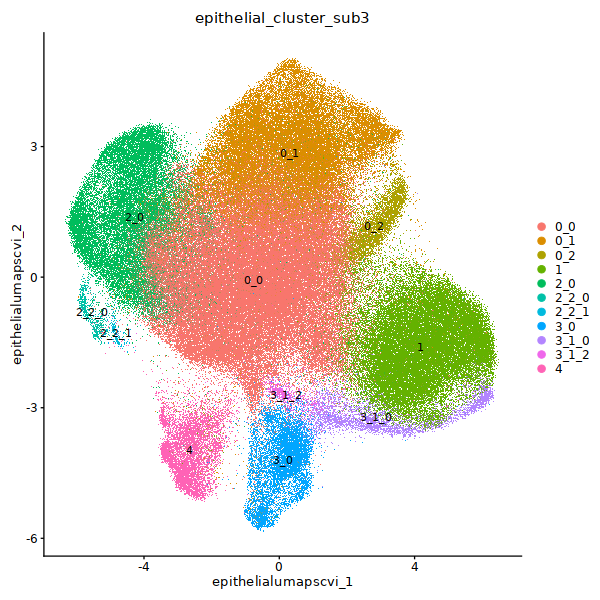

In [69]:
epithelial_reint@meta.data <- epithelial_reint@meta.data %>% 
                    mutate(epithelial_cluster_sub3 = case_when(epithelial_cluster_sub3 == '3_1_1' ~ '3_1_0',
                                                               epithelial_cluster_sub3 == '3_1_3' ~ '3_1_0',
                                                               TRUE ~ epithelial_cluster_sub3
                                                              ))

set_size(6,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'epithelial_cluster_sub3', label = TRUE)

## Epithelial cell type annotation

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



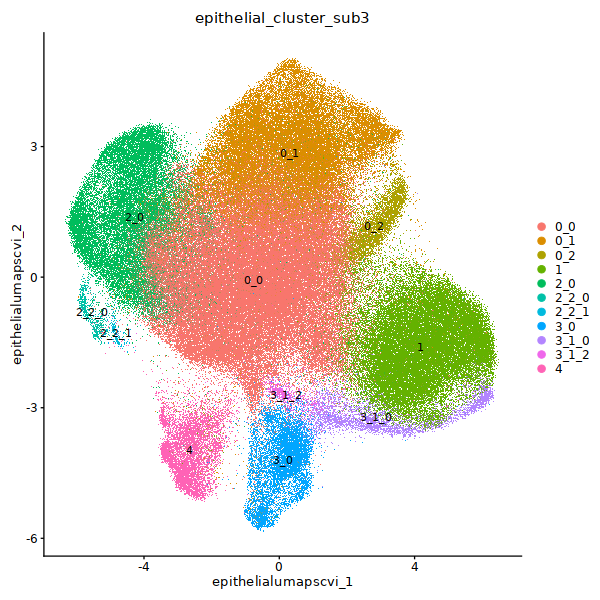

In [70]:
set_size(6,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'epithelial_cluster_sub3', label = TRUE)

In [72]:
epithelial_reint@meta.data <- epithelial_reint@meta.data %>% 
                              mutate(epi_cell_type = case_when(
                                  epithelial_cluster_sub3 == '0_0' ~ 'Stem-like tumor',
                                  epithelial_cluster_sub3 == '0_1' ~ 'Angiogenic tumor',
                                  epithelial_cluster_sub3 == '0_2' ~ 'Proliferative stem-like tumor',
                                  epithelial_cluster_sub3 == '1' ~ 'Proliferative tumor',
                                  epithelial_cluster_sub3 == '2_0' ~ 'APCDD1+ tumor',
                                  epithelial_cluster_sub3 == '2_2_0' ~ 'Enteroendocrine-like cells',
                                  epithelial_cluster_sub3 == '2_2_1' ~ 'Tuft cells',
                                  epithelial_cluster_sub3 == '3_0' ~ 'Enterocytes',
                                  epithelial_cluster_sub3 == '3_1_0' ~ 'Transit-amplifying cells',
                                  epithelial_cluster_sub3 == '3_1_2' ~ 'Stem cells',
                                  epithelial_cluster_sub3 == '4' ~ 'Goblet cells'
                              ))

In [73]:
epithelial_reint@meta.data %>% select(epi_cell_type) %>% 
                               write.csv('mCRC_epithelial_metadata.csv', row.names = TRUE)

In [74]:
saveRDS(epithelial_reint, '57_Integrated_normalized_mCRC_snRNA_noDB_v7_epithelial_clean4.rds')

In [75]:
epithelial_reint$epi_cell_type <- factor(epithelial_reint$epi_cell_type, 
                                         levels = c('APCDD1+ tumor', 'Angiogenic tumor', 'Proliferative tumor',
                                                    'Proliferative stem-like tumor', 'Stem-like tumor',
                                                    'Stem cells', 'Enterocytes', 'Transit-amplifying cells', 
                                                    'Goblet cells', 'Tuft cells', 'Enteroendocrine-like cells'
                                                   ))

In [94]:
epi.cell.color <- c("APCDD1+ tumor" = '#008856',
                    "Angiogenic tumor" = '#be0032',
                    "Proliferative tumor" = '#f3c300',
                    "Proliferative stem-like tumor" = '#8db600',
                    "Stem-like tumor" = '#e68fac',
                    "Stem cells" = '#e25822',
                    "Enterocytes" = '#882d17',
                    "Transit-amplifying cells" = '#a1caf1',
                    "Goblet cells" = '#c2b280',
                    "Tuft cells" = '#f99379',
                    "Enteroendocrine-like cells" = '#2b3d26'
                   )

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

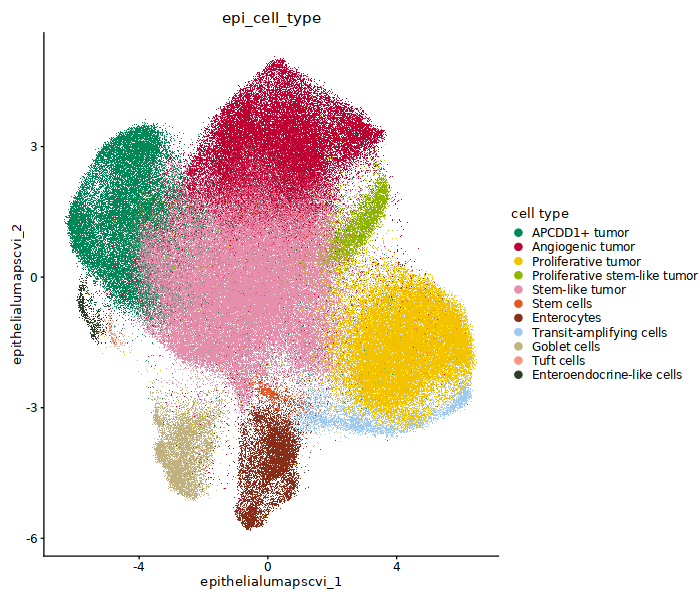

In [99]:
set_size(7,6)
p <- DimPlot(epithelial_reint, 
             reduction = 'epithelial_umap.scvi',  
             group.by = 'epi_cell_type', 
             label=FALSE) + scale_color_manual(values=epi.cell.color, name='cell type')
p

pdf("Dimplot_mCRC_epithelial_cell_type.pdf", width=7, height=6)
print(p)
dev.off()

In [102]:
Idents(epithelial_reint) = "epi_cell_type"
epithelial_markers = FindAllMarkers(epithelial_reint, 
                                    min.pct=0.1, 
                                    logfc.threshold=0.5, 
                                    only.pos = TRUE, 
                                    return.thresh = 0.01,
                                    test.use = 'MAST'
                                    )

write.csv(epithelial_markers, "mCRC_epithelial_mast_deg.csv", row.names = TRUE)

Calculating cluster APCDD1+ tumor

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.6 GiB”

 Completed [--------------------------------------------]   0% with 0 failures

 Completed [--------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   2% with 0 failures

 Completed [>-------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   4% with 0 failures

 Completed [=>------------------------------------------]   5% with 0 failures

 Completed [=>------------------------------------------]   6% with 0 failures

 Completed [==>-----------------------------------------]   6% with 0 failures

 Completed [==>-----------------------------------------]   7% with

## Dotplot for markers

In [10]:
epithelial_reint$epi_cell_type <- factor(epithelial_reint$epi_cell_type, 
                                         levels = rev(c('APCDD1+ tumor', 'Angiogenic tumor', 'Proliferative tumor',
                                                    'Proliferative stem-like tumor', 'Stem-like tumor',
                                                    'Stem cells', 'Enterocytes', 'Transit-amplifying cells', 
                                                    'Goblet cells', 'Tuft cells', 'Enteroendocrine-like cells'
                                                   )))

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


png 
  2

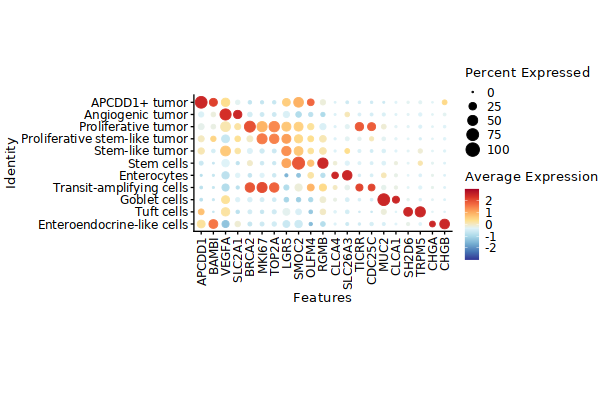

In [22]:
DefaultAssay(epithelial_reint) <- 'RNA'

rdylbu_colors <- rev(colorRampPalette(brewer.pal(10, "RdYlBu"))(10))
color_breaks <- c(-2, -1, 0, 1, 2)
#dotplot.color <- colorRampPalette(c('#eae2b7','#fcbf49','#f77f00','#d62828', '#003049'))(10) 

p6 <- DotPlot(epithelial_reint, 
              group.by = 'epi_cell_type', 
              feature = c('APCDD1', 'BAMBI', 'VEGFA', 'SLC2A1', 'BRCA2', 'MKI67', 'TOP2A', 'LGR5', 'SMOC2', 'OLFM4', 'RGMB', 
                          'CLCA4', 'SLC26A3', 'TICRR', 'CDC25C', 'MUC2', 'CLCA1', 'SH2D6', 'TRPM5', 'CHGA', 'CHGB')
             ) +
      theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) + #, legend.byrow = FALSE, legend.direction = 'vertical', legend.position = 'bottom') +
      coord_fixed() +
      scale_color_gradientn(colors = rdylbu_colors, 
                            limits = c(-3, 3),    # Set limits to -2 and 2
                            breaks = color_breaks # Specify the breaks
      ) +         
      scale_size_area(limits = c(0, 100), oob = scales::squish)

set_size(6,4)
p6

pdf("Dotplot_mCRC_epithelial_cell_type_RNA.pdf", width=8, height=8)
print(p6)
dev.off()

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


png 
  2

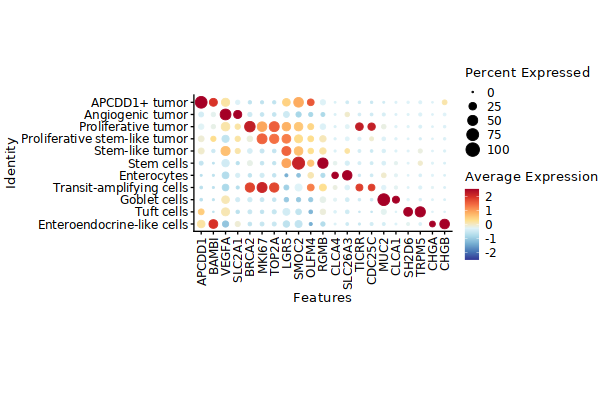

In [24]:
DefaultAssay(epithelial_reint) <- 'SCT'

rdylbu_colors <- rev(colorRampPalette(brewer.pal(10, "RdYlBu"))(10))
#dotplot.color <- colorRampPalette(c('#eae2b7','#fcbf49','#f77f00','#d62828', '#003049'))(10) 

p6 <- DotPlot(epithelial_reint, 
              group.by = 'epi_cell_type', 
              feature = c('APCDD1', 'BAMBI', 'VEGFA', 'SLC2A1', 'BRCA2', 'MKI67', 'TOP2A', 'LGR5', 'SMOC2', 'OLFM4', 'RGMB', 
                          'CLCA4', 'SLC26A3', 'TICRR', 'CDC25C', 'MUC2', 'CLCA1', 'SH2D6', 'TRPM5', 'CHGA', 'CHGB')) +
      theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) + #, legend.byrow = FALSE, legend.direction = 'vertical', legend.position = 'bottom') +
      coord_fixed() +
      scale_color_gradientn(colors = rdylbu_colors, 
                            limits = c(-2.5, 2.5),    # Set limits to -2 and 2
                            breaks = color_breaks # Specify the breaks
      ) +         
      scale_size_area(limits = c(0, 100), oob = scales::squish)

set_size(6,4)
p6

pdf("Dotplot_mCRC_epithelial_cell_type_SCT.pdf", width=8, height=8)
print(p6)
dev.off()

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


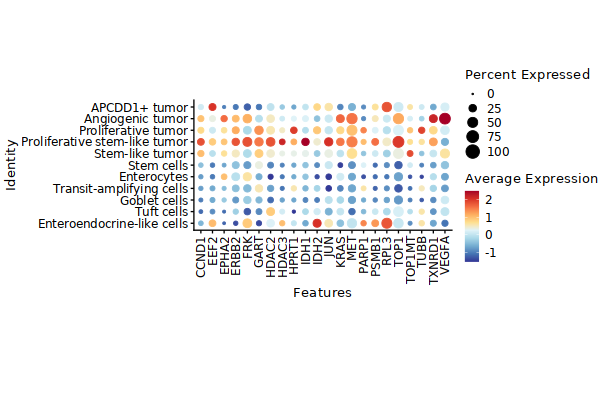

In [576]:
set_size(6,4)
DotPlot(epithelial_reint, 
              group.by = 'epi_cell_type', 
              feature = c('CCND1', 'EEF2', 'EPHA2', 'ERBB2', 'FRK', 'GART', 'HDAC2', 'HDAC3',
                          'HPRT1', 'IDH1', 'IDH2', 'JUN', 'KRAS', 'MET', 'PARP1', 'PSMB1', 'RPL3', 
                          'TOP1', 'TOP1MT', 'TUBB', 'TXNRD1', 'VEGFA')) +
      theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) + #, legend.byrow = FALSE, legend.direction = 'vertical', legend.position = 'bottom') +
      coord_fixed() +
      scale_color_gradientn(colors = rdylbu_colors) +       
      scale_size_area(limits = c(0, 100), oob = scales::squish)

## SLC2A1 subcluster

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 41465
Number of edges: 487370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9188
Number of communities: 7
Elapsed time: 3 seconds


[1] "APCDD1+ tumor"                 "Proliferative tumor"          
 [3] "Stem-like tumor"               "Angiogenic tumor_0"           
 [5] "Proliferative stem-like tumor" "Angiogenic tumor_1"           
 [7] "Angiogenic tumor_2"            "Enterocytes"                  
 [9] "Transit-amplifying cells"      "Goblet cells"                 
[11] "Enteroendocrine-like cells"    "Tuft cells"                   
[13] "Angiogenic tumor_3"            "Stem cells"                   
[15] "Angiogenic tumor_4"            "Angiogenic tumor_5"           
[17] "Angiogenic tumor_6"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



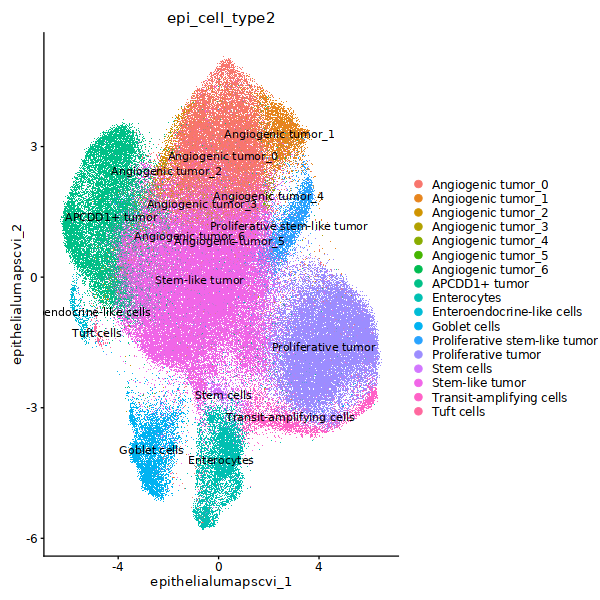

In [291]:
Idents(epithelial_reint) = "epi_cell_type"
epithelial_reint = FindSubCluster(object = epithelial_reint,
                                  cluster = 'Angiogenic tumor',
                                  graph.name = 'RNA_snn',
                                  subcluster.name = "epi_cell_type2",
                                  resolution = 0.1,
                                  algorithm = 1
                                  )
unique(epithelial_reint$epi_cell_type2)

set_size(6,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'epi_cell_type2', label = TRUE)

In [293]:
table(epithelial_reint$epi_cell_type2)


           Angiogenic tumor_0            Angiogenic tumor_1 
                        32734                          5313 
           Angiogenic tumor_2            Angiogenic tumor_3 
                         2013                          1238 
           Angiogenic tumor_4            Angiogenic tumor_5 
                          163                             2 
           Angiogenic tumor_6                 APCDD1+ tumor 
                            2                         27562 
                  Enterocytes    Enteroendocrine-like cells 
                         9197                           720 
                 Goblet cells Proliferative stem-like tumor 
                         7939                          5135 
          Proliferative tumor                    Stem cells 
                        40659                           985 
              Stem-like tumor      Transit-amplifying cells 
                        87401                          4422 
                   Tuft

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



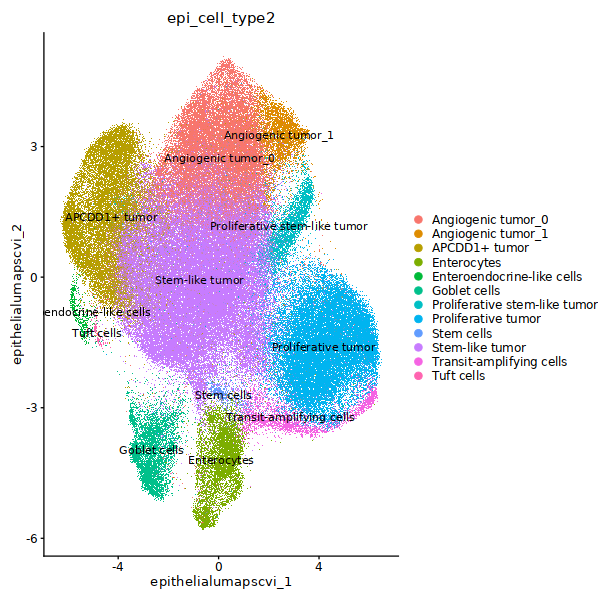

In [296]:
epithelial_reint@meta.data <- epithelial_reint@meta.data %>% 
                    mutate(epi_cell_type2 = case_when(epi_cell_type2 == 'Angiogenic tumor_4' ~ 'Angiogenic tumor_1',
                                                      epi_cell_type2 == 'Angiogenic tumor_5' ~ 'Angiogenic tumor_1',
                                                      epi_cell_type2 == 'Angiogenic tumor_2' ~ 'Angiogenic tumor_0',
                                                      epi_cell_type2 == 'Angiogenic tumor_3' ~ 'Angiogenic tumor_0',
                                                      epi_cell_type2 == 'Angiogenic tumor_6' ~ 'Angiogenic tumor_0',
                                                      TRUE ~ epi_cell_type2
                                                              ))

set_size(6,6)
DimPlot(epithelial_reint, reduction = 'epithelial_umap.scvi', group.by = 'epi_cell_type2', label = TRUE)

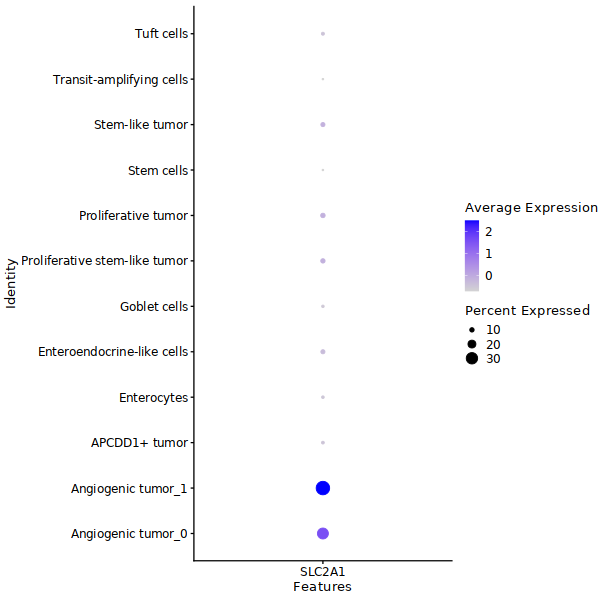

In [297]:
DotPlot(epithelial_reint, feature = c('SLC2A1'), 
        group.by = 'epi_cell_type2')

# Clinical associations

## table of cell type proportions

In [6]:
setwd('/diskmnt/Projects/MetNet_analysis_2/Colorectal/Analysis/snRNA/Epithelial')

In [3]:
colnames(epithelial_reint@meta.data)

[1] "orig.ident"              "Patient_ID"             
 [3] "nCount_RNA"              "nFeature_RNA"           
 [5] "percent.mito"            "nCount_SCT"             
 [7] "nFeature_SCT"            "seurat_clusters"        
 [9] "S.Score"                 "G2M.Score"              
[11] "Phase"                   "SCT_snn_res.2"          
[13] "cell_type_RNA"           "cell_type_RNA_simple"   
[15] "Age"                     "Sex"                    
[17] "Site_of_Origin"          "Tissue_Type"            
[19] "Primary_Side"            "MSI"                    
[21] "MSI_score"               "Tx_in_6mo"              
[23] "scrublet_doublet"        "DF_doublet"             
[25] "cell_type_integrated"    "cell_type_simple"       
[27] "cell_type_integrated2"   "cell_type_simple2"      
[29] "mCRCv6_clusters_0.2"     "mCRCv6_clusters_0.4"    
[31] "mCRCv6_clusters_0.6"     "mCRCv6_clusters_0.8"    
[33] "mCRCv6_clusters_1"       "mCRCv6_clusters_1.2"    
[35] "mCRCv6_clusters_1.4"     "mCRCv6_clusters_1.6"    
[37] "mCRCv6_clusters_1.8"     "mCRCv6_clusters_2"      
[39] "cell_type_simple3"       "cell_type_integrated3"  
[41] "epithelial_clusters_0.1" "APC_mutation"           
[43] "KRAS_mutation"           "TP53_mutation"          
[45] "APC_mut"                 "KRAS_mut"               
[47] "TP53_mut"                "epithelial_cluster_sub6"
[49] "epi_clusters_0.1"        "epithelial_cluster_sub0"
[51] "epithelial_cluster_sub2" "epithelial_cluster_sub3"
[53] "epi_cell_type"           "removal"

In [4]:
epi_metadata = epithelial_reint@meta.data %>% select('orig.ident', 'Patient_ID', 'Site_of_Origin', 
                                                     'Tissue_Type', 'Primary_Side', 'MSI', 'Tx_in_6mo', 'epi_cell_type')

tumor_metadata = epi_metadata %>% filter(epi_cell_type == 'APCDD1+ tumor' |
                                         epi_cell_type == 'Angiogenic tumor' |
                                         epi_cell_type == 'Proliferative tumor' |
                                         epi_cell_type == 'Proliferative stem-like tumor' |
                                         epi_cell_type == 'Stem-like tumor'
                                        ) %>% 
                                  filter(Tissue_Type != 'normal')

In [7]:
tumor_tbl <- tumor_metadata %>%
               group_by(orig.ident) %>% 
               summarise(cell_count = n(),
                         APCDD1_tumor_count = sum(epi_cell_type == 'APCDD1+ tumor', na.rm = TRUE),
                         APCDD1_tumor_proportion = round(100*APCDD1_tumor_count/n(),2),
                         Angiogenic_tumor_count = sum(epi_cell_type == 'Angiogenic tumor', na.rm = TRUE),
                         Angiogenic_tumor_proportion = round(100*Angiogenic_tumor_count/n(),2),
                         Proliferative_tumor_count = sum(epi_cell_type == 'Proliferative tumor', na.rm = TRUE),
                         Proliferative_tumor_proportion = round(100*Proliferative_tumor_count/n(),2),
                         Proliferative_stem_tumor_count = sum(epi_cell_type == 'Proliferative stem-like tumor', na.rm = TRUE),
                         Proliferative_stem_tumor_proportion = round(100*Proliferative_stem_tumor_count/n(),2),
                         Stem_like_tumor_count = sum(epi_cell_type == 'Stem-like tumor', na.rm = TRUE),
                         Stem_like_tumor_proportion = round(100*Stem_like_tumor_count/n(),2),
                         tissue_type = dplyr::first(Tissue_Type),
                         Organ = dplyr::first(Site_of_Origin),
                         Patient_ID = dplyr::first(Patient_ID),
                         Primary_Side = dplyr::first(Primary_Side),
                         MSI = dplyr::first(MSI),
                         Tx_in_6mo = dplyr::first(Tx_in_6mo),
                         .groups = 'drop')

write.table(tumor_tbl, 'mCRC_tumor_proportion_tbl.tsv', sep = "\t", row.names = FALSE, col.names = TRUE, quote = FALSE)
tumor_tbl = tumor_tbl %>% filter(cell_count > 100)
write.table(tumor_tbl, 'mCRC_tumor_proportion_tbl_filter100.tsv', sep = "\t", row.names = FALSE, col.names = TRUE, quote = FALSE)

In [234]:
plot_clinical_clusters <- function(data, columns, var, ncol = 1, nrow = 1, palette = c("#00AFBB", "#FC4E07"), show_pvalues = TRUE) {
  plot_list <- list()  
  
  for (col in columns) {
    formula <- paste(col, "~", var)
    
    if (show_pvalues) {
      stat <- data %>% wilcox_test(as.formula(formula)) %>% add_xy_position(x = var)
    }
    
    plot <- ggboxplot(data, var, col,
                      color = var, palette = palette,
                      add = "jitter")
    
    if (show_pvalues) {
      plot <- plot + stat_pvalue_manual(stat, label = "p", tip.length = 0.01)
    }
    
    plot_list[[length(plot_list) + 1]] <- plot
  }
  
  # Combine all plots into one figure
  combined_plot <- ggarrange(plotlist = plot_list, ncol = ncol, nrow = nrow)
  
  return(combined_plot)
}

## Primary vs. Metastasis

png 
  2

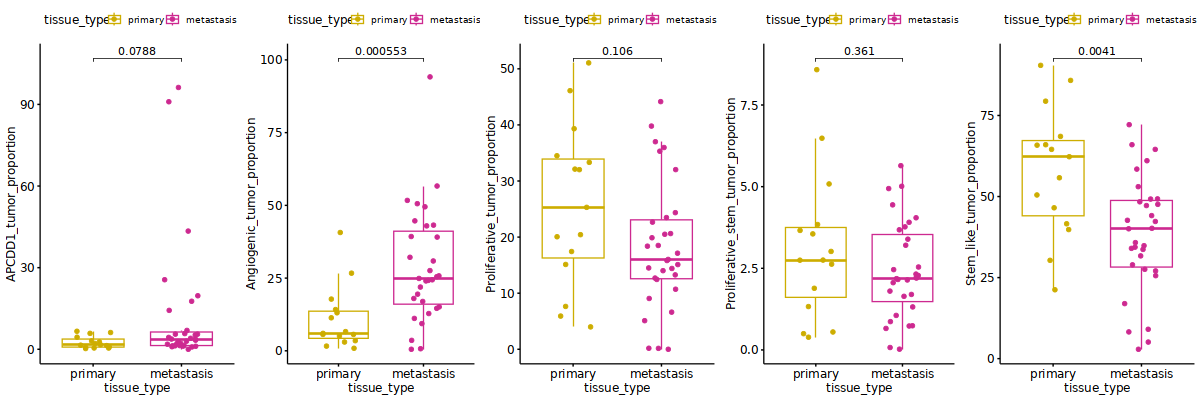

In [221]:
columns_to_plot <- c("APCDD1_tumor_proportion", "Angiogenic_tumor_proportion", "Proliferative_tumor_proportion",
                     "Proliferative_stem_tumor_proportion", "Stem_like_tumor_proportion"
                    )
combined_plot <- plot_clinical_clusters(data = tumor_tbl, 
                                        columns = columns_to_plot, 
                                        var = "tissue_type", 
                                        palette = c('gold3', 'maroon3'),
                                        ncol = 5, nrow = 1)

set_size(12, 4)
print(combined_plot)

pdf("Boxplot_mCRC_tumor_proportion_primary_vs_metastasis.pdf", width=12, height=4)
combined_plot
dev.off()

## Organ type

In [224]:
unique(tumor_tbl$Organ)

[1] "colon"   "liver"   "lung"    "rectum"  "adrenal" "brain"   "spleen" 
[8] "breast"

png 
  2

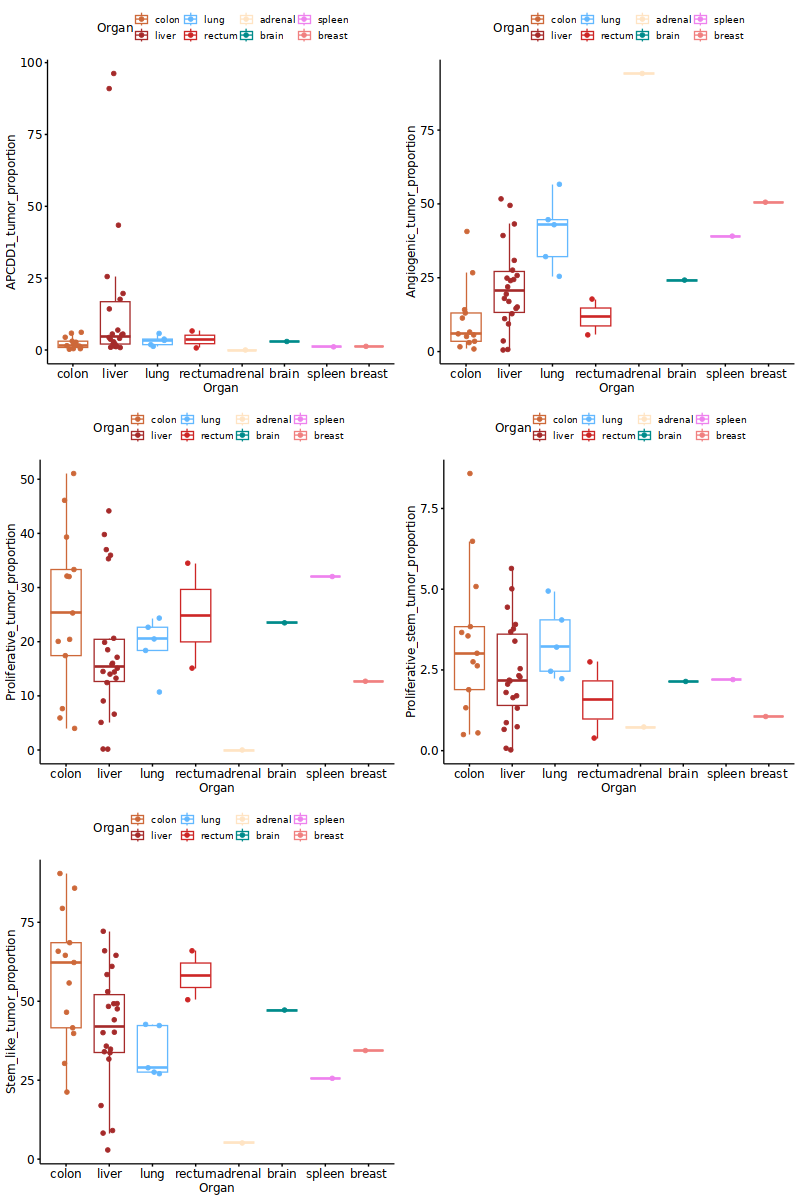

In [240]:

combined_plot <- plot_clinical_clusters(data = tumor_tbl, 
                                        columns = columns_to_plot, 
                                        var = "Organ", 
                                        palette = c('sienna3', 'brown', 'steelblue1',
                                                    'firebrick3', 'bisque1', 'cyan4',
                                                    'violet', 'lightcoral'
                                                   ),
                                        show_pvalues = FALSE,
                                        ncol = 2, nrow = 3)

set_size(8, 12)
print(combined_plot)

pdf("Boxplot_mCRC_tumor_proportion_organs.pdf", width=10, height=12)
combined_plot
dev.off()

## Primary side

In [466]:
unique(tumor_tbl$Primary_Side)

[1] "R"      "L"      NA       "Rectum"

png 
  2

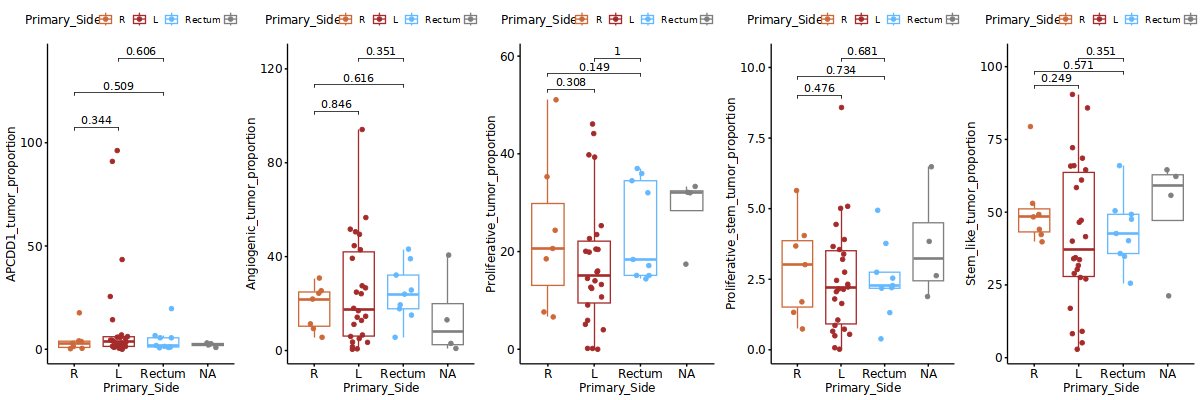

In [504]:
combined_plot <- plot_clinical_clusters(data = tumor_tbl, 
                                        columns = columns_to_plot, 
                                        var = "Primary_Side", 
                                        palette = c('sienna3', 'brown', 'steelblue1'
                                                   ),
                                        show_pvalues = TRUE,
                                        ncol = 5, nrow = 1)

set_size(12, 4)
print(combined_plot)

pdf("Boxplot_mCRC_tumor_proportion_Primary_Side.pdf", width=12, height=4)
combined_plot
dev.off()

In [506]:
liver_tbl = tumor_tbl %>% filter(Organ == 'liver')

In [508]:
primary_tbl = tumor_tbl %>% filter(tissue_type == 'primary')

png 
  2

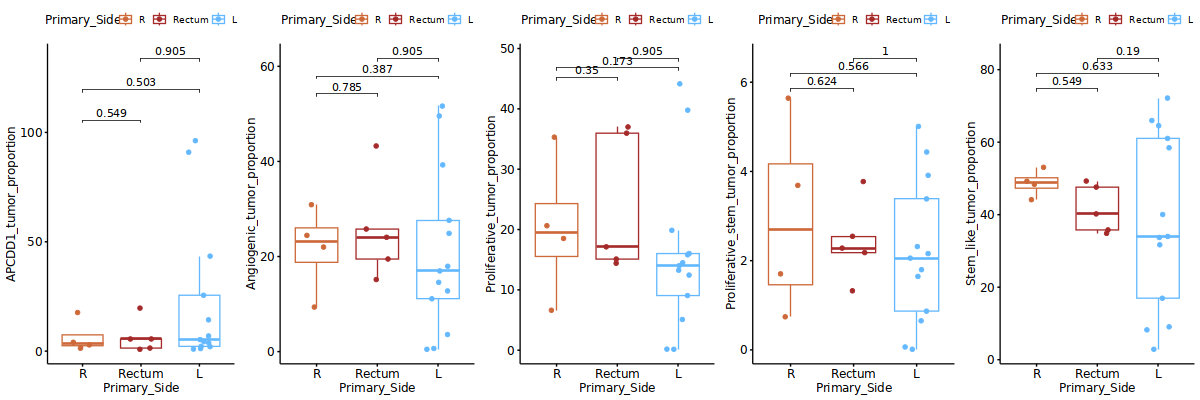

In [507]:
combined_plot <- plot_clinical_clusters(data = liver_tbl, 
                                        columns = columns_to_plot, 
                                        var = "Primary_Side", 
                                        palette = c('sienna3', 'brown', 'steelblue1'
                                                   ),
                                        show_pvalues = TRUE,
                                        ncol = 5, nrow = 1)

set_size(12, 4)
print(combined_plot)

pdf("Boxplot_mCRC_liver_tumor_proportion_Primary_Side.pdf", width=12, height=4)
combined_plot
dev.off()

png 
  2

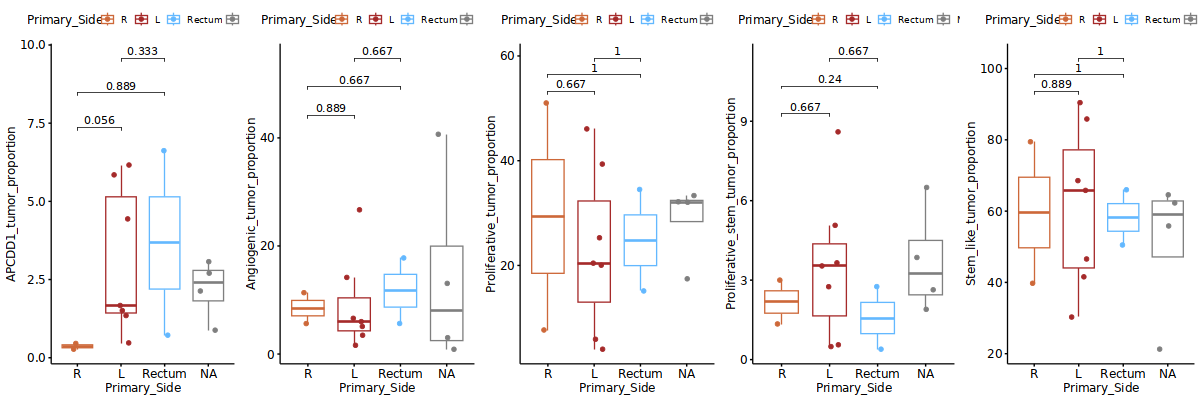

In [509]:
combined_plot <- plot_clinical_clusters(data = primary_tbl, 
                                        columns = columns_to_plot, 
                                        var = "Primary_Side", 
                                        palette = c('sienna3', 'brown', 'steelblue1'
                                                   ),
                                        show_pvalues = TRUE,
                                        ncol = 5, nrow = 1)

set_size(12, 4)
print(combined_plot)

pdf("Boxplot_mCRC_primary_tumor_proportion_Primary_Side.pdf", width=12, height=4)
combined_plot
dev.off()

## MSI

png 
  2

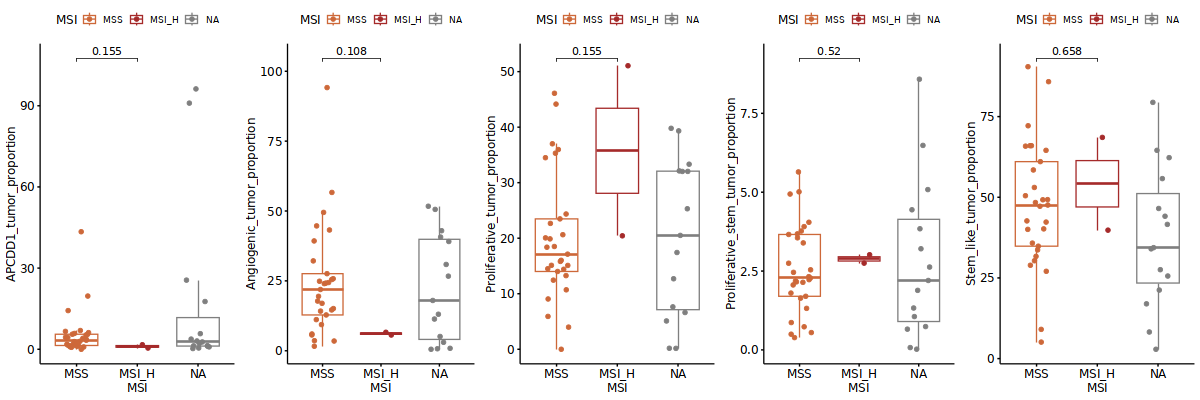

In [505]:
combined_plot <- plot_clinical_clusters(data = tumor_tbl, 
                                        columns = columns_to_plot, 
                                        var = "MSI", 
                                        palette = c('sienna3', 'brown', 'steelblue1'
                                                   ),
                                        show_pvalues = TRUE,
                                        ncol = 5, nrow = 1)

set_size(12, 4)
print(combined_plot)

pdf("Boxplot_mCRC_tumor_proportion_MSI.pdf", width=12, height=4)
combined_plot
dev.off()

png 
  2

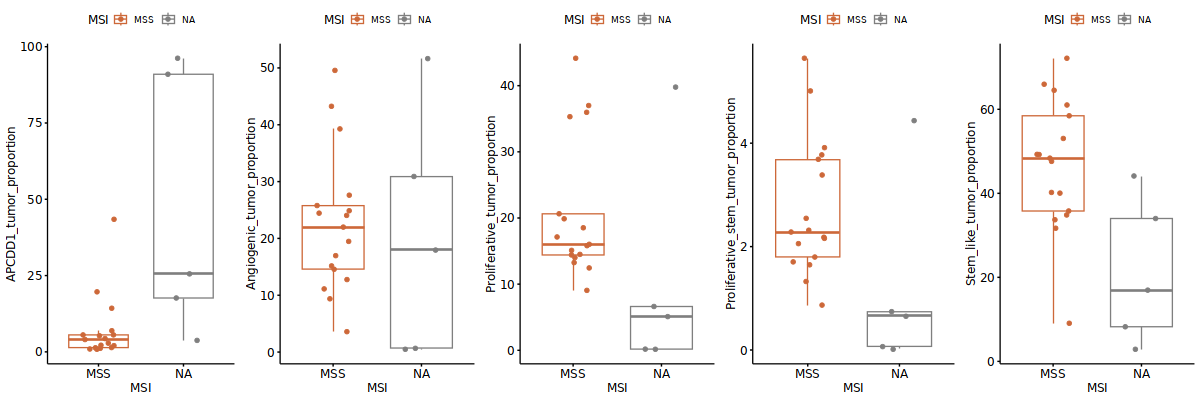

In [511]:
combined_plot <- plot_clinical_clusters(data = liver_tbl, 
                                        columns = columns_to_plot, 
                                        var = "MSI", 
                                        palette = c('sienna3', 'brown', 'steelblue1'
                                                   ),
                                        show_pvalues = FALSE,
                                        ncol = 5, nrow = 1)

set_size(12, 4)
print(combined_plot)

pdf("Boxplot_mCRC_liver_tumor_proportion_MSI.pdf", width=12, height=4)
combined_plot
dev.off()

In [513]:
table(primary_tbl$MSI, primary_tbl$Primary_Side)

       
        L R Rectum
  MSI_H 1 1      0
  MSS   4 0      2

png 
  2

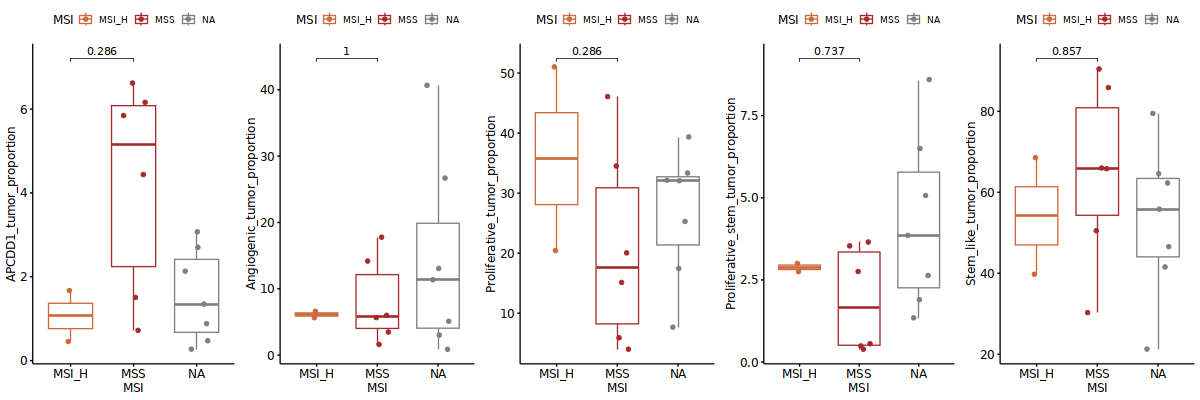

In [512]:
combined_plot <- plot_clinical_clusters(data = primary_tbl, 
                                        columns = columns_to_plot, 
                                        var = "MSI", 
                                        palette = c('sienna3', 'brown', 'steelblue1'
                                                   ),
                                        show_pvalues = TRUE,
                                        ncol = 5, nrow = 1)

set_size(12, 4)
print(combined_plot)

pdf("Boxplot_mCRC_primary_tumor_proportion_MSI.pdf", width=12, height=4)
combined_plot
dev.off()

## Treatment 

png 
  2

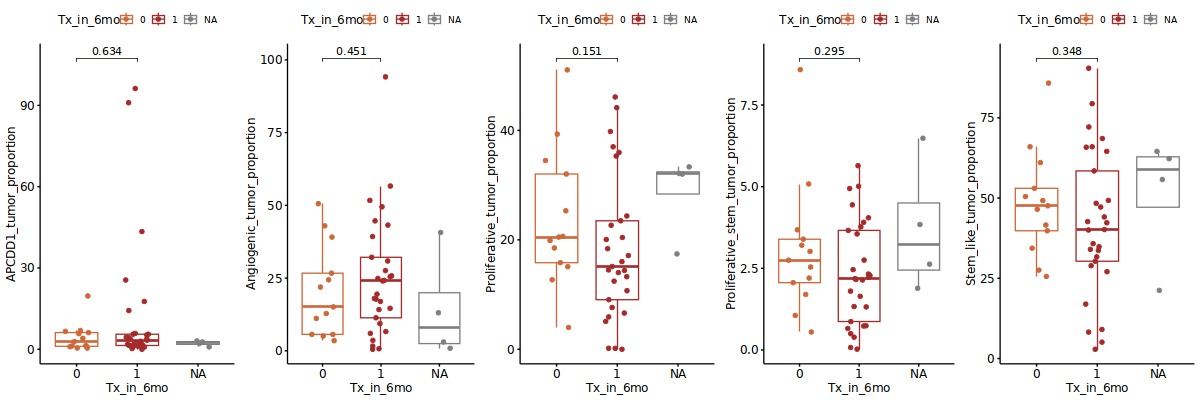

In [472]:
combined_plot <- plot_clinical_clusters(data = tumor_tbl, 
                                        columns = columns_to_plot, 
                                        var = "Tx_in_6mo", 
                                        palette = c('sienna3', 'brown', 'steelblue1'
                                                   ),
                                        show_pvalues = TRUE,
                                        ncol = 5, nrow = 1)

set_size(12, 4)
print(combined_plot)

pdf("Boxplot_mCRC_tumor_proportion_Tx_in_6mo.pdf", width=10, height=12)
combined_plot
dev.off()

In [515]:
iri_6mo <- c("CM1563C1-T1Y1", "CM1563C1-S1Y1", "CM354C1-T1", "CM354C2-T1", "CM426C1-Th1", "CM426C2-Tp1", "CM492C1-S1", "CM492C2-T1", "CM492C2-T2", "CM556C1-T1", "CM556C1-T2", 
	"CM556C2-T1", "CM655C1-S1", "CM663C1-T1", "CM873C1-S1", "HT225C1-Th1", "HT253C1-Th1", "HT260C1-Th1", "HT291C1-M1", "HT525C1-Th1", "HT539C1-Th1")
ox_6mo <- c("CM1563C1-T1Y1", "CM1563C1-S1Y1", "CM354C1-T1", "CM354C2-T1", "CM478C1-T1Y2", "CM492C1-S1", "CM492C2-T1", "CM492C2-T2", "CM556C1-T1", "CM556C1-T2", "CM556C2-T1", 
	"CM618C2-T1", "CM655C1-S1", "CM663C1-T1", "CM724C1-S1", "CM743C1-S1", "HT230C1-Th1", "HT291C1-M1", "HT307C1-Th1", "HT472C1-Th1", "HT472C1-S1", "HT525C1-Th1", "HT539C1-Th1")
bev_6mo <- c("CM1563C1-T1Y1", "CM1563C1-S1Y1", "CM354C1-T1", "CM354C2-T1", "CM426C1-Th1", "CM426C2-Tp1", "CM492C1-S1", 
	"CM492C2-T1", "CM492C2-T2", "CM556C1-T1", "CM556C1-T2", "CM556C2-T1", "CM655C1-S1", "CM663C1-T1", "HT225C1-Th1",
	"HT260C1-Th1", "HT291C1-M1", "HT307C1-Th1", "HT539C1-Th1")
egfr_6mo <- c("CM873C1-S1")
icb_6mo <- c("HT307C1-Th1", "HT525C1-Th1")
rt_6mo <- c("CM743C1-S1", "HT525C1-Th1")

In [516]:
tumor_tbl$IRI_6mo <- ifelse(tumor_tbl$orig.ident %in% iri_6mo, 'Yes', 'No')
tumor_tbl$OX_6mo <- ifelse(tumor_tbl$orig.ident %in% ox_6mo, 'Yes', 'No')
tumor_tbl$BEV_6mo <- ifelse(tumor_tbl$orig.ident %in% bev_6mo, 'Yes', 'No')
tumor_tbl$EGFR_6mo <- ifelse(tumor_tbl$orig.ident %in% egfr_6mo, 'Yes', 'No')
tumor_tbl$ICB_6mo <- ifelse(tumor_tbl$orig.ident %in% icb_6mo, 'Yes', 'No')
tumor_tbl$RT_6mo <- ifelse(tumor_tbl$orig.ident %in% rt_6mo, 'Yes', 'No')

In [542]:
colnames(tumor_tbl)

[1] "orig.ident"                          "cell_count"                         
 [3] "APCDD1_tumor_count"                  "APCDD1_tumor_proportion"            
 [5] "Angiogenic_tumor_count"              "Angiogenic_tumor_proportion"        
 [7] "Proliferative_tumor_count"           "Proliferative_tumor_proportion"     
 [9] "Proliferative_stem_tumor_count"      "Proliferative_stem_tumor_proportion"
[11] "Stem_like_tumor_count"               "Stem_like_tumor_proportion"         
[13] "tissue_type"                         "Organ"                              
[15] "Patient_ID"                          "Primary_Side"                       
[17] "MSI"                                 "Tx_in_6mo"                          
[19] "IRI_6mo"                             "OX_6mo"                             
[21] "BEV_6mo"                             "EGFR_6mo"                           
[23] "ICB_6mo"                             "RT_6mo"

In [535]:
liver_tbl <- tumor_tbl %>% filter(Organ == 'liver')

In [543]:
primary_tbl <- tumor_tbl %>% filter(tissue_type == 'primary')

png 
  2

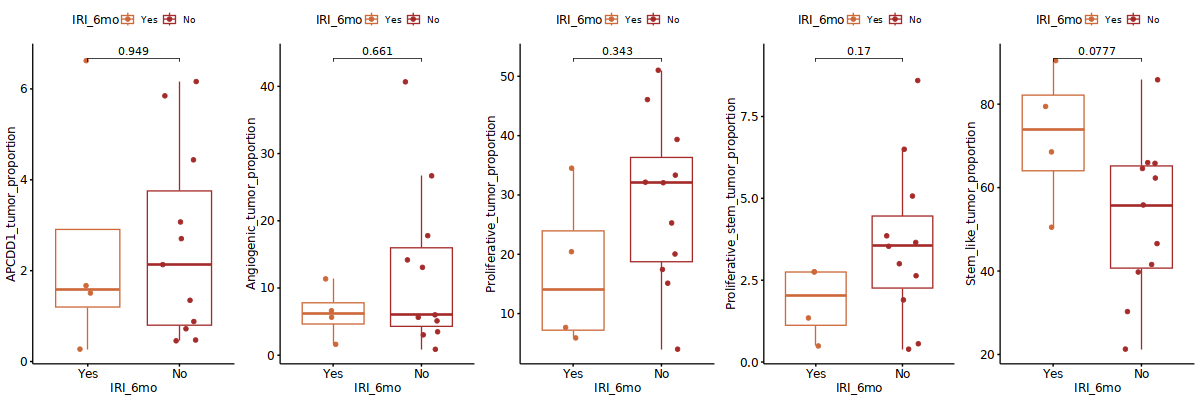

In [544]:
combined_plot <- plot_clinical_clusters(data = primary_tbl, 
                                        columns = columns_to_plot, 
                                        var = "IRI_6mo", 
                                        palette = c('sienna3', 'brown'
                                                   ),
                                        show_pvalues = TRUE,
                                        ncol = 5, nrow = 1)

set_size(12, 4)
print(combined_plot)

pdf("Boxplot_mCRC_primary_tumor_proportion_IRI_6mo.pdf", width=10, height=12)
combined_plot
dev.off()

png 
  2

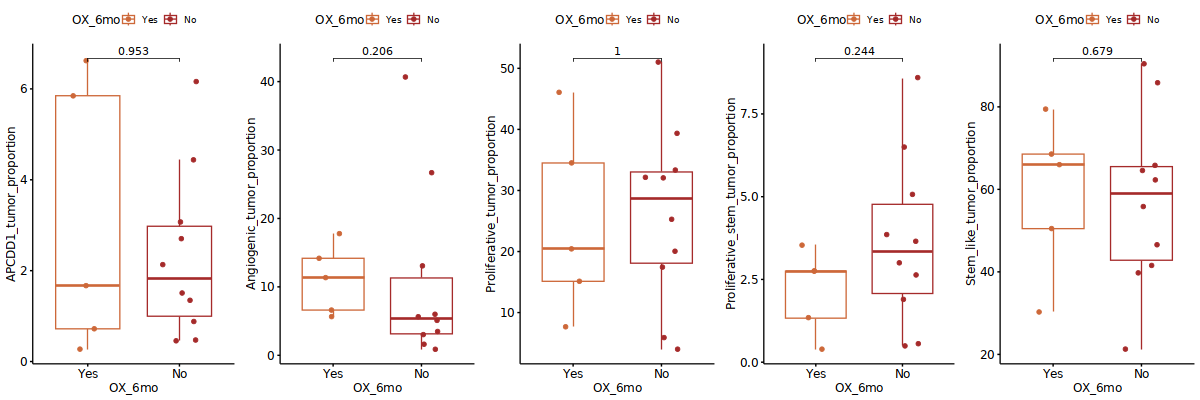

In [545]:
combined_plot <- plot_clinical_clusters(data = primary_tbl, 
                                        columns = columns_to_plot, 
                                        var = "OX_6mo", 
                                        palette = c('sienna3', 'brown'
                                                   ),
                                        show_pvalues = TRUE,
                                        ncol = 5, nrow = 1)

set_size(12, 4)
print(combined_plot)

pdf("Boxplot_mCRC_primary_tumor_proportion_OX_6mo.pdf", width=10, height=12)
combined_plot
dev.off()

png 
  2

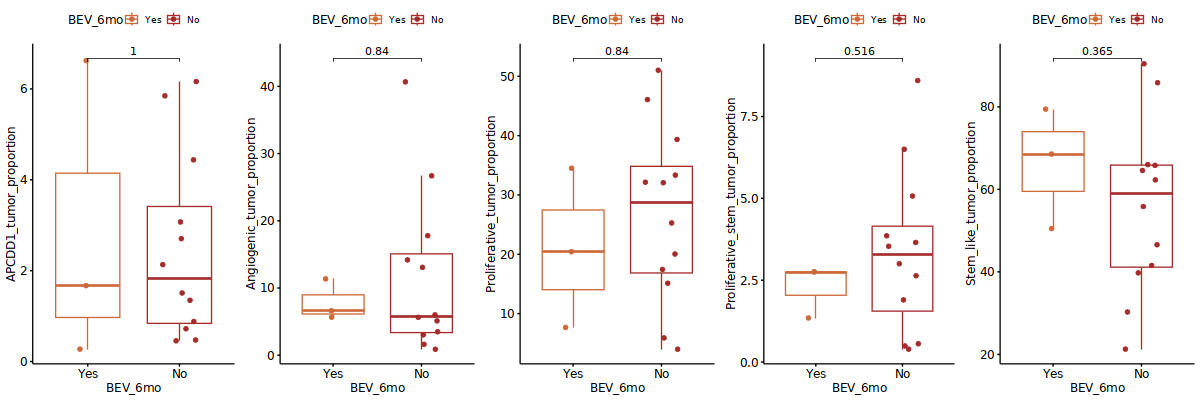

In [546]:
combined_plot <- plot_clinical_clusters(data = primary_tbl, 
                                        columns = columns_to_plot, 
                                        var = "BEV_6mo", 
                                        palette = c('sienna3', 'brown'
                                                   ),
                                        show_pvalues = TRUE,
                                        ncol = 5, nrow = 1)

set_size(12, 4)
print(combined_plot)

pdf("Boxplot_mCRC_primary_tumor_proportion_BEV_6mo.pdf", width=10, height=12)
combined_plot
dev.off()

png 
  2

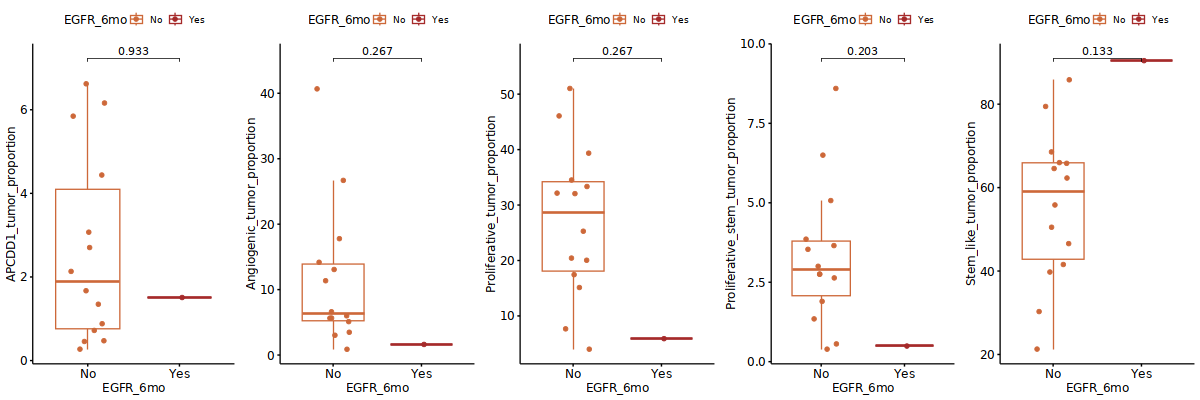

In [547]:
combined_plot <- plot_clinical_clusters(data = primary_tbl, 
                                        columns = columns_to_plot, 
                                        var = "EGFR_6mo", 
                                        palette = c('sienna3', 'brown'
                                                   ),
                                        show_pvalues = TRUE,
                                        ncol = 5, nrow = 1)

set_size(12, 4)
print(combined_plot)

pdf("Boxplot_mCRC_primary_tumor_proportion_EGFR_6mo.pdf", width=10, height=12)
combined_plot
dev.off()

png 
  2

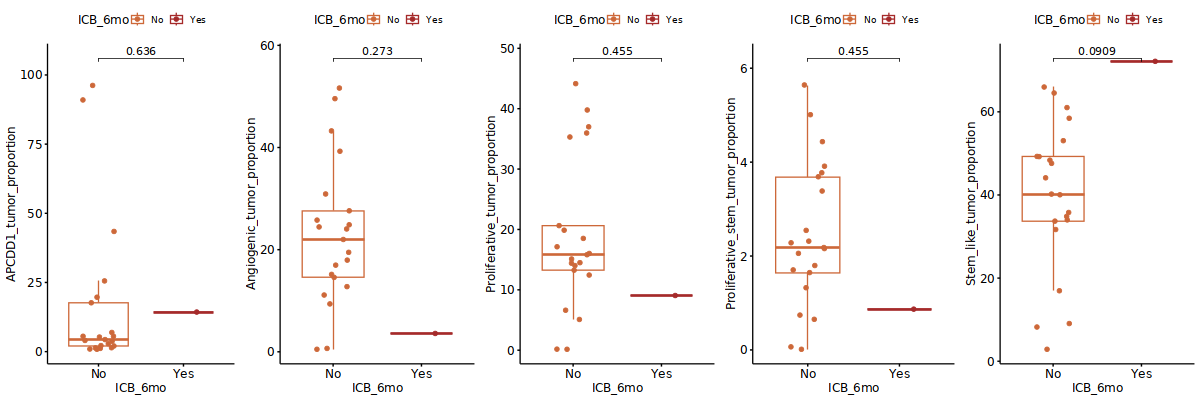

In [549]:
combined_plot <- plot_clinical_clusters(data = liver_tbl, 
                                        columns = columns_to_plot, 
                                        var = "ICB_6mo", 
                                        palette = c('sienna3', 'brown'
                                                   ),
                                        show_pvalues = TRUE,
                                        ncol = 5, nrow = 1)

set_size(12, 4)
print(combined_plot)

pdf("Boxplot_mCRC_liver_tumor_proportion_ICB_6mo.pdf", width=10, height=12)
combined_plot
dev.off()

png 
  2

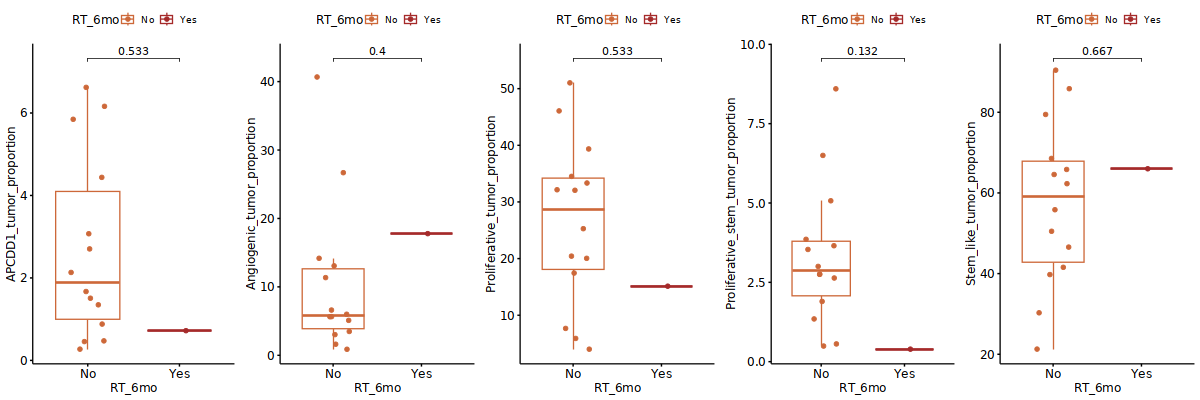

In [550]:
combined_plot <- plot_clinical_clusters(data = primary_tbl, 
                                        columns = columns_to_plot, 
                                        var = "RT_6mo", 
                                        palette = c('sienna3', 'brown'
                                                   ),
                                        show_pvalues = TRUE,
                                        ncol = 5, nrow = 1)

set_size(12, 4)
print(combined_plot)

pdf("Boxplot_mCRC_primary_tumor_proportion_RT_6mo.pdf", width=10, height=12)
combined_plot
dev.off()

## Survival analysis

### load survival data

In [244]:
gs4_deauth()
clinical_info.df <- read_sheet('https://docs.google.com/spreadsheets/d/1kKb-DC3jobabcp29VNkkrN024XcHBDavkiFEBxKsBTg/edit#gid=981909369', 
                    sheet = "Clinical")
clinical_info_selected <- clinical_info.df %>% dplyr::select('Patient ID', Dx_to_death_or_last_fu_days, 'Vital status')
head(clinical_info_selected, 1)

✔ Reading from "mCRC_tracking ".

✔ Range ''Clinical''.



Patient ID Dx_to_death_or_last_fu_days Vital status
1 HT112C1    2223                        alive

In [275]:
tumor_tbl_survival <- tumor_tbl %>% left_join(clinical_info_selected, by = c("Patient_ID" = "Patient ID"))
tumor_tbl_survival$Vital_status <- as.numeric(tumor_tbl_survival$'Vital status' == "dead")
head(tumor_tbl_survival, 10)

orig.ident    cell_count APCDD1_tumor_count APCDD1_tumor_proportion
1  CM1563C1-S1Y1  2185        6                 0.27                  
2  CM1563C1-T1Y1   136       24                17.65                  
3  CM268C1-T1     1086       31                 2.85                  
4  CM318C1-S1     2522       34                 1.35                  
5  CM329C1-S1     9259       43                 0.46                  
6  CM349C1-S1    11042      490                 4.44                  
7  CM350C1-S1     3194       15                 0.47                  
8  CM354C2-T1     3132      119                 3.80                  
9  CM357C1-S1     2867       61                 2.13                  
10 CM374C1-S1     5411      166                 3.07                  
   Angiogenic_tumor_count Angiogenic_tumor_proportion Proliferative_tumor_count
1   248                   11.35                        167                     
2    42                   30.88                          9                     
3   238                   21.92                        201                     
4   673                   26.69                        638                     
5   522                    5.64                       4728                     
6   663                    6.00                       2215                     
7   163                    5.10                       1256                     
8   798                   25.48                        763                     
9  1166                   40.67                        921                     
10  707                   13.07                        943                     
   Proliferative_tumor_proportion Proliferative_stem_tumor_count
1   7.64                           29                           
2   6.62                            1                           
3  18.51                           40                           
4  25.30                          128                           
5  51.06                          280                           
6  20.06                          404                           
7  39.32                          274                           
8  24.36                          127                           
9  32.12                          110                           
10 17.43                          102                           
   Proliferative_stem_tumor_proportion ⋯ Stem_like_tumor_proportion tissue_type
1  1.33                                ⋯ 79.41                      primary    
2  0.74                                ⋯ 44.12                      metastasis 
3  3.68                                ⋯ 53.04                      metastasis 
4  5.08                                ⋯ 41.59                      primary    
5  3.02                                ⋯ 39.81                      primary    
6  3.66                                ⋯ 65.84                      primary    
7  8.58                                ⋯ 46.52                      primary    
8  4.05                                ⋯ 42.31                      metastasis 
9  3.84                                ⋯ 21.24                      primary    
10 1.89                                ⋯ 64.55                      primary    
   Organ Patient_ID Primary_Side MSI   Tx_in_6mo Dx_to_death_or_last_fu_days
1  colon CM1563C1   R            NA     1        1227                       
2  liver CM1563C1   R            NA     1        1227                       
3  liver CM268C1    R            MSS    0          NA                       
4  colon CM318C1    L            NA     0         960                       
5  colon CM329C1    R            MSI_H  0        2451                       
6  colon CM349C1    L            MSS    1        2166                       
7  colon CM350C1    L            NA     0        3899                       
8  lung  CM354C2    R            MSS    1          NA                       
9  colon CM357C1    NA           NA    NA          NA 

In [276]:
colnames(tumor_tbl_survival)

[1] "orig.ident"                          "cell_count"                         
 [3] "APCDD1_tumor_count"                  "APCDD1_tumor_proportion"            
 [5] "Angiogenic_tumor_count"              "Angiogenic_tumor_proportion"        
 [7] "Proliferative_tumor_count"           "Proliferative_tumor_proportion"     
 [9] "Proliferative_stem_tumor_count"      "Proliferative_stem_tumor_proportion"
[11] "Stem_like_tumor_count"               "Stem_like_tumor_proportion"         
[13] "tissue_type"                         "Organ"                              
[15] "Patient_ID"                          "Primary_Side"                       
[17] "MSI"                                 "Tx_in_6mo"                          
[19] "Dx_to_death_or_last_fu_days"         "Vital status"                       
[21] "Vital_status"

In [401]:
prepare_survival_data <- function(data, tissue_type_col = "tissue_type", tissue_type_value = "metastasis", 
                                    time_col_days = "Dx_to_death_or_last_fu_days", 
                                    proportions_cols = list("Angiogenic_tumor_proportion", 
                                                            "APCDD1_tumor_proportion", 
                                                            "Proliferative_tumor_proportion", 
                                                            "Proliferative_stem_tumor_proportion", 
                                                            "Stem_like_tumor_proportion")) {
  
  # Filter the data for the specified tissue type
  filtered_data <- data %>% filter(!!sym(tissue_type_col) == tissue_type_value)
  
  # Calculate the median values for each specified tumor proportion column
  medians <- lapply(proportions_cols, function(col) {
    median(filtered_data[[col]], na.rm = TRUE)
  })
  names(medians) <- proportions_cols
  
  # Create grouping variables based on the median values
  for (col in proportions_cols) {
    group_col_name <- paste0(gsub("_tumor_proportion", "", col), "_tumor_group")
    print(paste(col, 'median:', medians[[col]]))  
    filtered_data[[group_col_name]] <- ifelse(filtered_data[[col]] <= medians[[col]], "Low", "High")
  }
  
  # Convert time from days to months
  time_col_months <- gsub("_days", "_months", time_col_days)
  filtered_data[[time_col_months]] <- filtered_data[[time_col_days]] / 30
  
  # Filter out rows with NA in the time column
  result_data <- filtered_data %>% filter(!is.na(filtered_data[[time_col_days]]))
  
  return(result_data)
}

# Example usage:
# metastasis_sample_tbl <- prepare_metastasis_data(tumor_tbl_survival)


In [402]:
metastasis_sample_tbl <- prepare_survival_data(tumor_tbl_survival,
                                               tissue_type_col = "tissue_type", 
                                               tissue_type_value = "metastasis",
                                               time_col_days = "Dx_to_death_or_last_fu_days"
                                              )

[1] "Angiogenic_tumor_proportion median: 24.88"
[1] "APCDD1_tumor_proportion median: 3.76"
[1] "Proliferative_tumor_proportion median: 16.02"
[1] "Proliferative_stem_tumor_proportion median: 2.2"
[1] "Stem_like_tumor_proportion median: 40.05"


In [403]:
primary_sample_tbl <- prepare_survival_data(tumor_tbl_survival,
                                               tissue_type_col = "tissue_type", 
                                               tissue_type_value = "primary",
                                               time_col_days = "Dx_to_death_or_last_fu_days"
                                              )

[1] "Angiogenic_tumor_proportion median: 6"
[1] "APCDD1_tumor_proportion median: 1.67"
[1] "Proliferative_tumor_proportion median: 25.3"
[1] "Proliferative_stem_tumor_proportion median: 2.75"
[1] "Stem_like_tumor_proportion median: 62.28"


In [404]:
liver_sample_tbl <- prepare_survival_data(tumor_tbl_survival,
                                          tissue_type_col = "Organ", 
                                          tissue_type_value = "liver",
                                          time_col_days = "Dx_to_death_or_last_fu_days"
                                         )

[1] "Angiogenic_tumor_proportion median: 20.695"
[1] "APCDD1_tumor_proportion median: 4.815"
[1] "Proliferative_tumor_proportion median: 15.46"
[1] "Proliferative_stem_tumor_proportion median: 2.17"
[1] "Stem_like_tumor_proportion median: 42.16"


In [454]:
liver_sample_tbl <- liver_sample_tbl %>% mutate(Angiogenic_low_APCDD1 = if_else(Angiogenic_tumor_group == 'High' & 
                                                                                APCDD1_tumor_group == 'Low', 
                                                                                'High_angiogenic_Low_APCDD1',
                                                                                'Others'))

In [458]:
liver_sample_tbl <- liver_sample_tbl %>% 
                    mutate(Angiogenic_APCDD1_cat = 
                           case_when(Angiogenic_tumor_group == 'High' & APCDD1_tumor_group == 'Low' ~'High_angiogenic_Low_APCDD1',
                                     Angiogenic_tumor_group == 'High' & APCDD1_tumor_group == 'High' ~'High_angiogenic_High_APCDD1',
                                     Angiogenic_tumor_group == 'Low' & APCDD1_tumor_group == 'Low' ~'Low_angiogenic_Low_APCDD1',
                                     Angiogenic_tumor_group == 'Low' & APCDD1_tumor_group == 'High' ~'Low_angiogenic_High_APCDD1'))

In [459]:
liver_sample_tbl

orig.ident                 cell_count APCDD1_tumor_count
1  CM1563C1-T1Y1                136        24              
2  CM426C1-Th1                 8729       122              
3  CM556C1-T1                  3280       173              
4  CM663C1-T1                  1891        22              
5  HT112C1-T1                   788       155              
6  HT225C1-Th1                10599      4604              
7  HT230C1-Th1                20667       176              
8  HT250C1-Th1                 1373       351              
9  HT253C1-Th1                 7561       165              
10 HT254C1-Th1                 3466       140              
11 HT260C1-Th1                 5742       216              
12 HT342C1-Th1                 3295        31              
13 HT413C1-Th1K2A2Nd1_2Bma1_1 10942      9954              
14 HT413C1-Th1K4A2Nd1_2Bma1_1  8167      7858              
15 HT472C1-Th1                 5381       110              
16 HT525C1-Th1                  916       131              
17 HT539C1-Th1                 4172       182              
   APCDD1_tumor_proportion Angiogenic_tumor_count Angiogenic_tumor_proportion
1  17.65                     42                   30.88                      
2   1.40                   2097                   24.02                      
3   5.27                    479                   14.60                      
4   1.16                    936                   49.50                      
5  19.67                    119                   15.10                      
6  43.44                   2923                   27.58                      
7   0.85                   8931                   43.21                      
8  25.56                    710                   51.71                      
9   2.18                   1283                   16.97                      
10  4.04                    846                   24.41                      
11  3.76                   1033                   17.99                      
12  0.94                    367                   11.14                      
13 90.97                     58                    0.53                      
14 96.22                     58                    0.71                      
15  2.04                   1339                   24.88                      
16 14.30                     33                    3.60                      
17  4.36                   1639                   39.29                      
   Proliferative_tumor_count Proliferative_tumor_proportion
1     9                       6.62                         
2  3140                      35.97                         
3   435                      13.26                         
4   265                      14.01                         
5   119                      15.10                         
6  1698                      16.02                         
7  2978                      14.41                         
8    70                       5.10                         
9  3338                      44.15                         
10  715                      20.63                         
11 2285                      39.79                         
12  655                      19.88                         
13   20                       0.18                         
14   13                       0.16                         
15  670                      12.45                         
16   83                       9.06                         
17  605                      14.50                         
   Proliferative_stem_tumor_count Proliferative_stem_tumor_proportion ⋯
1    1                            0.74                                ⋯
2  329                            3.77                                ⋯
3   76                            2.32                                ⋯
4   31                            1.64                                ⋯
5   20                            2.54                                ⋯
6  414 

In [406]:
lung_sample_tbl <- prepare_survival_data(tumor_tbl_survival,
                                          tissue_type_col = "Organ", 
                                          tissue_type_value = "lung",
                                          time_col_days = "Dx_to_death_or_last_fu_days"
                                         )

[1] "Angiogenic_tumor_proportion median: 42.95"
[1] "APCDD1_tumor_proportion median: 3.35"
[1] "Proliferative_tumor_proportion median: 20.51"
[1] "Proliferative_stem_tumor_proportion median: 3.21"
[1] "Stem_like_tumor_proportion median: 28.93"


### survival analysis

In [359]:
library(survival)
library(survminer)

#### All metastasis

##### Angiogenic_tumor_group

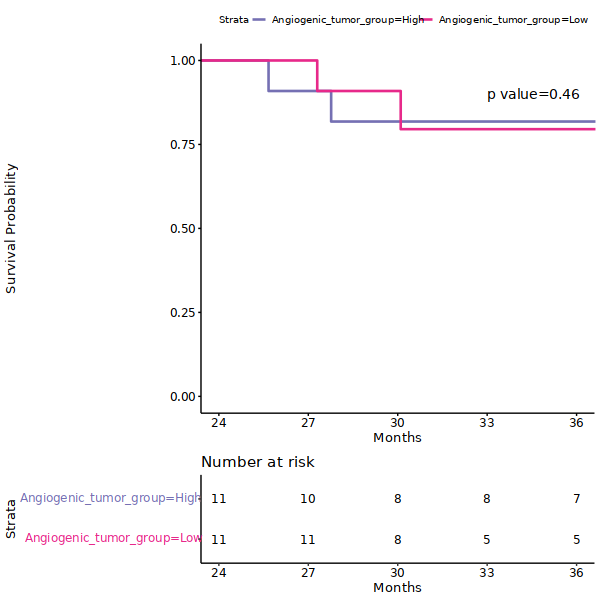

In [405]:
# Prepare your survival object
surv_obj <- Surv(time = metastasis_sample_tbl$Dx_to_death_or_last_fu_months, event = metastasis_sample_tbl$'Vital_status')

# Fit a survival curve
fit <- survfit(surv_obj ~ Angiogenic_tumor_group, data = metastasis_sample_tbl)

surv_diff <- survdiff(surv_obj ~ Angiogenic_tumor_group, data = metastasis_sample_tbl)
p_value <- round(1 - pchisq(surv_diff$chisq, df = 1), 2)

surv_plot <- ggsurvplot(fit, 
                        data = metastasis_sample_tbl, 
                        palette = c("#7570B3", "#E7298A"),
                        xlab = "Months",
                        ylab = "Survival Probability",
                        xlim = c(24, 36),
                        break.x.by = 3,    
                        #ggtheme = theme_minimal(),
                        censor = FALSE,
                        risk.table = TRUE,
                        pval = paste0("p value=", p_value),
                        pval.coord = c(33, 0.9)  
                       )

set_size(6,6)
surv_plot

##### APCDD1_tumor_group

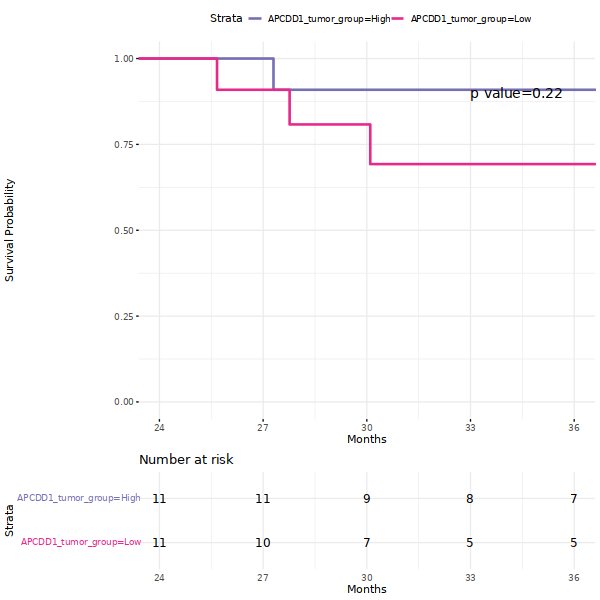

In [420]:
surv_obj <- Surv(time = metastasis_sample_tbl$Dx_to_death_or_last_fu_months, event = metastasis_sample_tbl$'Vital_status')

fit <- survfit(surv_obj ~ APCDD1_tumor_group, data = metastasis_sample_tbl)

surv_diff <- survdiff(surv_obj ~ APCDD1_tumor_group, data = metastasis_sample_tbl)
p_value <- round(1 - pchisq(surv_diff$chisq, df = 1), 2)

surv_plot <- ggsurvplot(fit, 
                        data = metastasis_sample_tbl, 
                        palette = c("#7570B3", "#E7298A"),
                        xlab = "Months",
                        ylab = "Survival Probability",
                        xlim = c(24, 36),
                        break.x.by = 3,    
                        ggtheme = theme_minimal(),
                        censor = FALSE,
                        risk.table = TRUE,
                        pval = paste0("p value=", p_value),
                        pval.coord = c(33, 0.9)  
                       )

set_size(6,6)
surv_plot

##### Proliferative_tumor_group

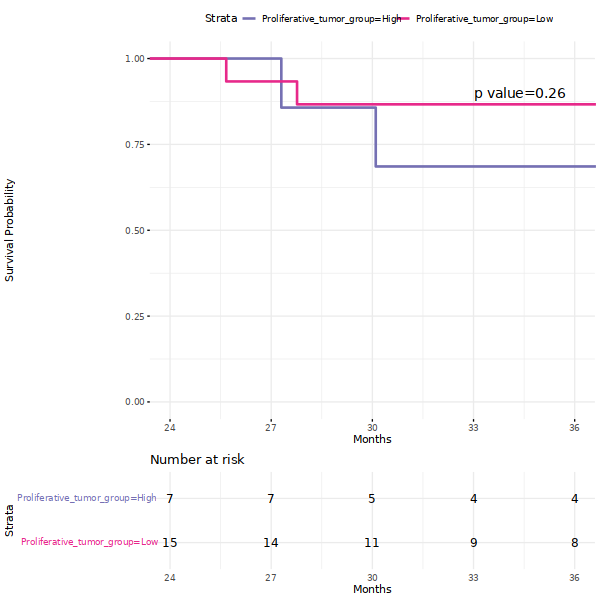

In [421]:
surv_obj <- Surv(time = metastasis_sample_tbl$Dx_to_death_or_last_fu_months, event = metastasis_sample_tbl$'Vital_status')

fit <- survfit(surv_obj ~ Proliferative_tumor_group, data = metastasis_sample_tbl)

surv_diff <- survdiff(surv_obj ~ Proliferative_tumor_group, data = metastasis_sample_tbl)
p_value <- round(1 - pchisq(surv_diff$chisq, df = 1), 2)

surv_plot <- ggsurvplot(fit, 
                        data = metastasis_sample_tbl, 
                        palette = c("#7570B3", "#E7298A"),
                        xlab = "Months",
                        ylab = "Survival Probability",
                        xlim = c(24, 36),
                        break.x.by = 3,    
                        ggtheme = theme_minimal(),
                        censor = FALSE,
                        risk.table = TRUE,
                        pval = paste0("p value=", p_value),
                        pval.coord = c(33, 0.9)  
                       )

set_size(6,6)
surv_plot

##### Proliferative_stem_tumor_group

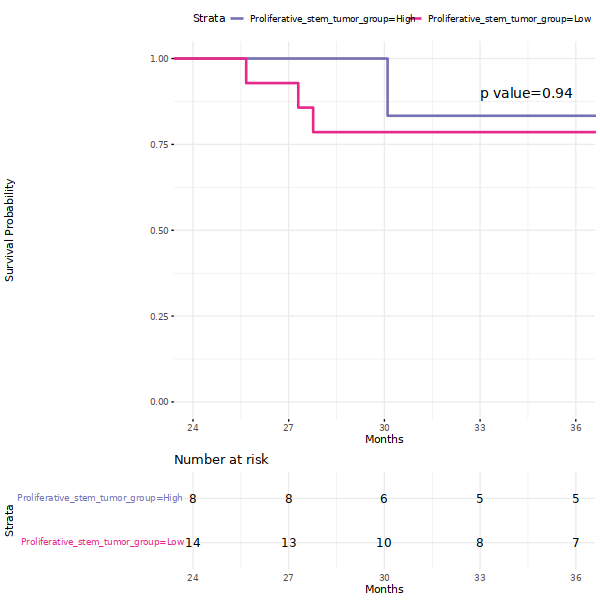

In [423]:
surv_obj <- Surv(time = metastasis_sample_tbl$Dx_to_death_or_last_fu_months, event = metastasis_sample_tbl$'Vital_status')

fit <- survfit(surv_obj ~ Proliferative_stem_tumor_group, data = metastasis_sample_tbl)

surv_diff <- survdiff(surv_obj ~ Proliferative_stem_tumor_group, data = metastasis_sample_tbl)
p_value <- round(1 - pchisq(surv_diff$chisq, df = 1), 2)

surv_plot <- ggsurvplot(fit, 
                        data = metastasis_sample_tbl, 
                        palette = c("#7570B3", "#E7298A"),
                        xlab = "Months",
                        ylab = "Survival Probability",
                        xlim = c(24, 36),
                        break.x.by = 3,    
                        ggtheme = theme_minimal(),
                        censor = FALSE,
                        risk.table = TRUE,
                        pval = paste0("p value=", p_value),
                        pval.coord = c(33, 0.9)  
                       )

set_size(6,6)
surv_plot

##### Stem_like_tumor_group

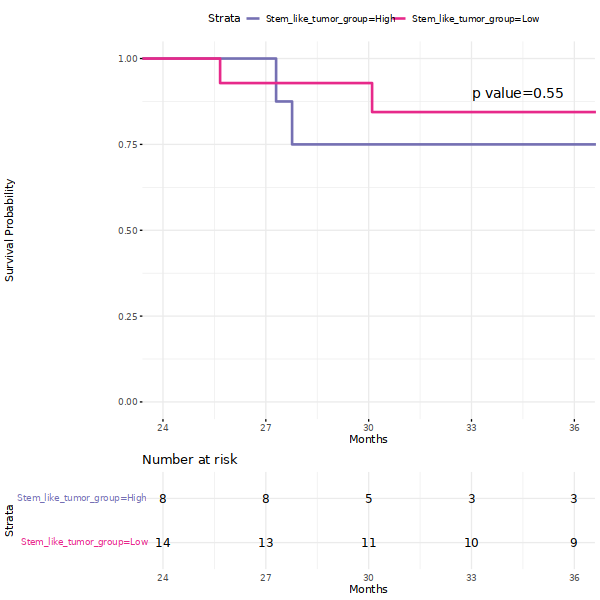

In [424]:
surv_obj <- Surv(time = metastasis_sample_tbl$Dx_to_death_or_last_fu_months, event = metastasis_sample_tbl$'Vital_status')

fit <- survfit(surv_obj ~ Stem_like_tumor_group, data = metastasis_sample_tbl)

surv_diff <- survdiff(surv_obj ~ Stem_like_tumor_group, data = metastasis_sample_tbl)
p_value <- round(1 - pchisq(surv_diff$chisq, df = 1), 2)

surv_plot <- ggsurvplot(fit, 
                        data = metastasis_sample_tbl, 
                        palette = c("#7570B3", "#E7298A"),
                        xlab = "Months",
                        ylab = "Survival Probability",
                        xlim = c(24, 36),
                        break.x.by = 3,    
                        ggtheme = theme_minimal(),
                        censor = FALSE,
                        risk.table = TRUE,
                        pval = paste0("p value=", p_value),
                        pval.coord = c(33, 0.9)  
                       )

set_size(6,6)
surv_plot

#### liver metastasis

##### Angiogenic_tumor_group

png 
  2

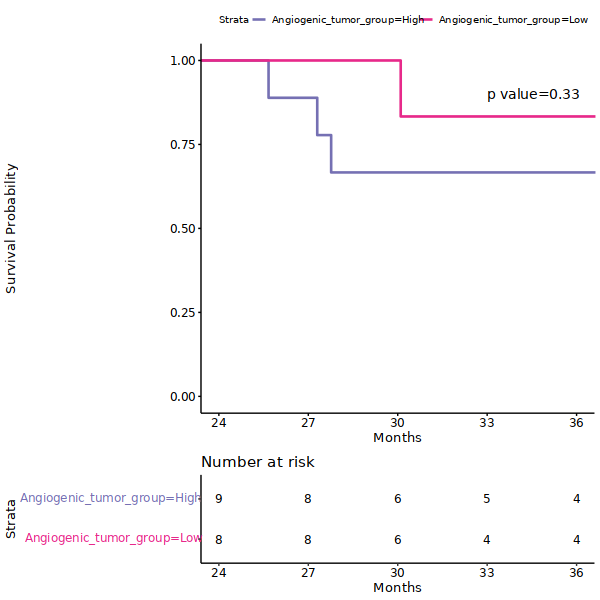

In [448]:
surv_obj <- Surv(time = liver_sample_tbl$Dx_to_death_or_last_fu_months, event = liver_sample_tbl$'Vital_status')

fit <- survfit(surv_obj ~ Angiogenic_tumor_group, data = liver_sample_tbl)

surv_diff <- survdiff(surv_obj ~ Angiogenic_tumor_group, data = liver_sample_tbl)
p_value <- round(1 - pchisq(surv_diff$chisq, df = 1), 2)

surv_plot <- ggsurvplot(fit, 
                        data = liver_sample_tbl, 
                        palette = c("#7570B3", "#E7298A"),
                        xlab = "Months",
                        ylab = "Survival Probability",
                        xlim = c(24, 36),
                        break.x.by = 3,    
                        #ggtheme = theme_minimal(),
                        censor = FALSE,
                        risk.table = TRUE,
                        pval = paste0("p value=", p_value),
                        pval.coord = c(33, 0.9)  
                       )

set_size(6,6)
surv_plot

pdf("SurvPlot_liver_meta_angiogenic_tumor.pdf", width=8, height=6)
surv_plot
dev.off()

# plot_obj <- surv_plot$plot
# ggsave(plot = plot_obj, "SurvPlot_liver_meta_angiogenic_tumor.pdf", width=6, height=6)

##### APCDD1_tumor_group

png 
  2

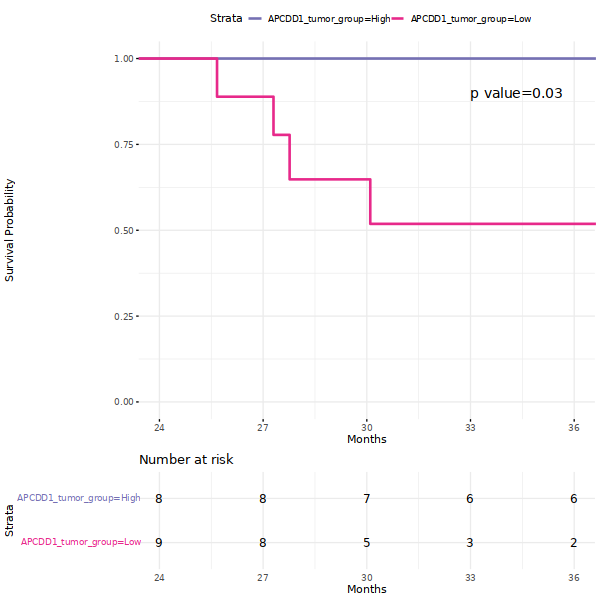

In [449]:
surv_obj <- Surv(time = liver_sample_tbl$Dx_to_death_or_last_fu_months, event = liver_sample_tbl$'Vital_status')

fit <- survfit(surv_obj ~ APCDD1_tumor_group, data = liver_sample_tbl)

surv_diff <- survdiff(surv_obj ~ APCDD1_tumor_group, data = liver_sample_tbl)
p_value <- round(1 - pchisq(surv_diff$chisq, df = 1), 2)

surv_plot <- ggsurvplot(fit, 
                        data = liver_sample_tbl, 
                        palette = c("#7570B3", "#E7298A"),
                        xlab = "Months",
                        ylab = "Survival Probability",
                        xlim = c(24, 36),
                        break.x.by = 3,    
                        ggtheme = theme_minimal(),
                        censor = FALSE,
                        risk.table = TRUE,
                        pval = paste0("p value=", p_value),
                        pval.coord = c(33, 0.9)  
                       )

set_size(6,6)
surv_plot

# plot_obj <- surv_plot$plot
# ggsave(plot = plot_obj, "SurvPlot_liver_meta_APCDD1_tumor.pdf", width=6, height=6)

pdf("SurvPlot_liver_meta_APCDD1_tumor.pdf", width=8, height=6)
surv_plot
dev.off()

##### Proliferative_tumor_group

png 
  2

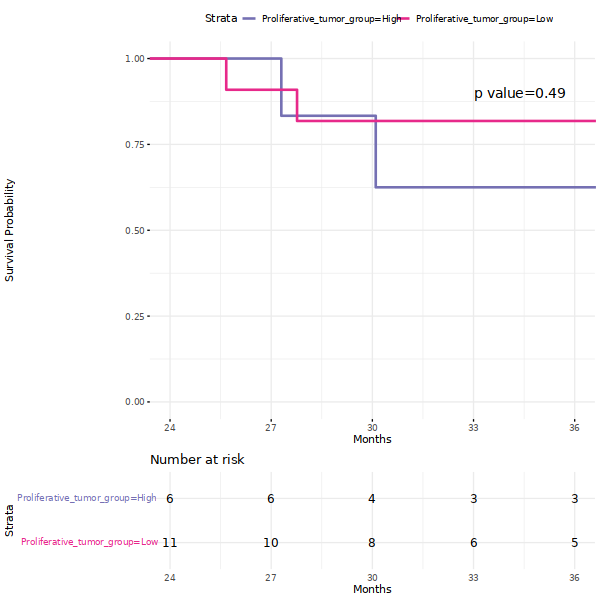

In [450]:
surv_obj <- Surv(time = liver_sample_tbl$Dx_to_death_or_last_fu_months, event = liver_sample_tbl$'Vital_status')

fit <- survfit(surv_obj ~ Proliferative_tumor_group, data = liver_sample_tbl)

surv_diff <- survdiff(surv_obj ~ Proliferative_tumor_group, data = liver_sample_tbl)
p_value <- round(1 - pchisq(surv_diff$chisq, df = 1), 2)

surv_plot <- ggsurvplot(fit, 
                        data = liver_sample_tbl, 
                        palette = c("#7570B3", "#E7298A"),
                        xlab = "Months",
                        ylab = "Survival Probability",
                        xlim = c(24, 36),
                        break.x.by = 3,    
                        ggtheme = theme_minimal(),
                        censor = FALSE,
                        risk.table = TRUE,
                        pval = paste0("p value=", p_value),
                        pval.coord = c(33, 0.9)  
                       )

set_size(6,6)
surv_plot

pdf("SurvPlot_liver_meta_Proliferative_tumor.pdf", width=8, height=6)
surv_plot
dev.off()

##### Proliferative_stem_tumor_group

png 
  2

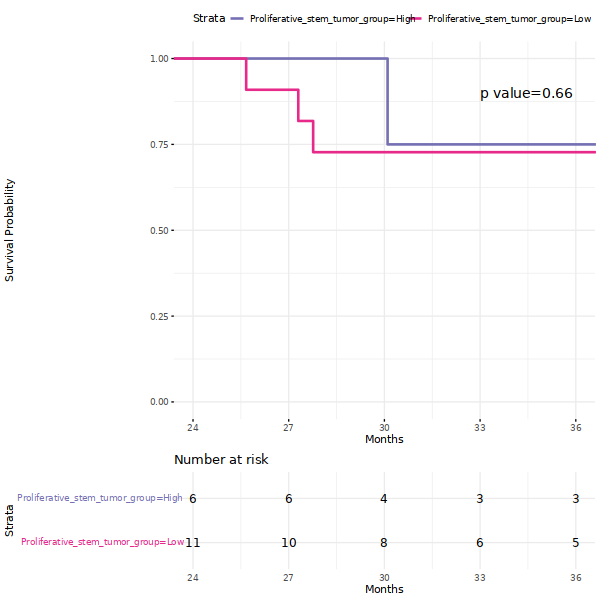

In [451]:
surv_obj <- Surv(time = liver_sample_tbl$Dx_to_death_or_last_fu_months, event = liver_sample_tbl$'Vital_status')

fit <- survfit(surv_obj ~ Proliferative_stem_tumor_group, data = liver_sample_tbl)

surv_diff <- survdiff(surv_obj ~ Proliferative_stem_tumor_group, data = liver_sample_tbl)
p_value <- round(1 - pchisq(surv_diff$chisq, df = 1), 2)

surv_plot <- ggsurvplot(fit, 
                        data = liver_sample_tbl, 
                        palette = c("#7570B3", "#E7298A"),
                        xlab = "Months",
                        ylab = "Survival Probability",
                        xlim = c(24, 36),
                        break.x.by = 3,    
                        ggtheme = theme_minimal(),
                        censor = FALSE,
                        risk.table = TRUE,
                        pval = paste0("p value=", p_value),
                        pval.coord = c(33, 0.9)  
                       )

set_size(6,6)
surv_plot

pdf("SurvPlot_liver_meta_Proliferative_stem_tumor.pdf", width=8, height=6)
surv_plot
dev.off()

##### Stem_like_tumor_group

png 
  2

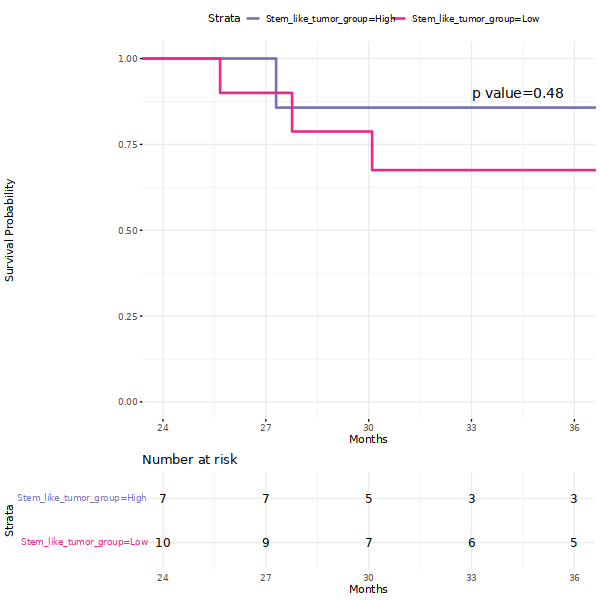

In [452]:
surv_obj <- Surv(time = liver_sample_tbl$Dx_to_death_or_last_fu_months, event = liver_sample_tbl$'Vital_status')

fit <- survfit(surv_obj ~ Stem_like_tumor_group, data = liver_sample_tbl)

surv_diff <- survdiff(surv_obj ~ Stem_like_tumor_group, data = liver_sample_tbl)
p_value <- round(1 - pchisq(surv_diff$chisq, df = 1), 2)

surv_plot <- ggsurvplot(fit, 
                        data = liver_sample_tbl, 
                        palette = c("#7570B3", "#E7298A"),
                        xlab = "Months",
                        ylab = "Survival Probability",
                        xlim = c(24, 36),
                        break.x.by = 3,    
                        ggtheme = theme_minimal(),
                        censor = FALSE,
                        risk.table = TRUE,
                        pval = paste0("p value=", p_value),
                        pval.coord = c(33, 0.9)  
                       )

set_size(6,6)
surv_plot

pdf("SurvPlot_liver_meta_Stem_like_tumor_tumor.pdf", width=8, height=6)
surv_plot
dev.off()

##### APCDD1 combined Angiogenic

Warning message:
“Removed 1 row containing missing values (`geom_step()`).”
Warning message:
“Removed 1 row containing missing values (`geom_step()`).”
Warning message:
“Removed 1 row containing missing values (`geom_step()`).”
Warning message:
“Removed 1 row containing missing values (`geom_step()`).”


png 
  2

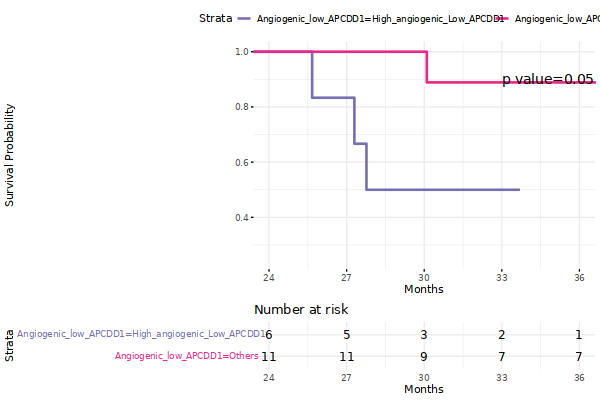

In [499]:
surv_obj <- Surv(time = liver_sample_tbl$Dx_to_death_or_last_fu_months, event = liver_sample_tbl$'Vital_status')

fit <- survfit(surv_obj ~ Angiogenic_low_APCDD1, data = liver_sample_tbl)

surv_diff <- survdiff(surv_obj ~ Angiogenic_low_APCDD1, data = liver_sample_tbl)
p_value <- round(1 - pchisq(surv_diff$chisq, df = 1), 2)

surv_plot <- ggsurvplot(fit, 
                        data = liver_sample_tbl, 
                        palette = c("#7570B3", "#E7298A"),
                        xlab = "Months",
                        ylab = "Survival Probability",
                        ylim = c(0.25, 1),
                        xlim = c(24, 36),
                        break.x.by = 3,    
                        ggtheme = theme_minimal(),
                        censor = FALSE,
                        risk.table = TRUE,
                        pval = paste0("p value=", p_value),
                        pval.coord = c(33, 0.9)  
                       )

set_size(6,4)
surv_plot

pdf("SurvPlot_liver_meta_Angiogenic_low_APCDD1_tumor.pdf", width=7, height=4)
surv_plot
dev.off()

png 
  2

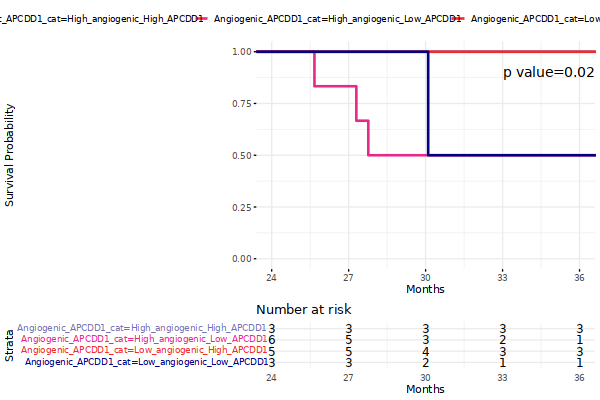

In [465]:
surv_obj <- Surv(time = liver_sample_tbl$Dx_to_death_or_last_fu_months, event = liver_sample_tbl$'Vital_status')

fit <- survfit(surv_obj ~ Angiogenic_APCDD1_cat, data = liver_sample_tbl)

surv_diff <- survdiff(surv_obj ~ Angiogenic_APCDD1_cat, data = liver_sample_tbl)
p_value <- round(1 - pchisq(surv_diff$chisq, df = 1), 2)

surv_plot <- ggsurvplot(fit, 
                        data = liver_sample_tbl, 
                        palette = c("#7570B3", "#E7298A", "firebrick2", "navyblue"),
                        xlab = "Months",
                        ylab = "Survival Probability",
                        xlim = c(24, 36),
                        break.x.by = 3,    
                        ggtheme = theme_minimal(),
                        censor = FALSE,
                        risk.table = TRUE,
                        pval = paste0("p value=", p_value),
                        pval.coord = c(33, 0.9)  
                       )

set_size(6,4)
surv_plot

pdf("SurvPlot_liver_meta_Angiogenic_combined_APCDD1_tumor.pdf", width=8, height=6)
surv_plot
dev.off()

#### lung metastasis:

Warning message in pchisq(chi, df, lower.tail = FALSE):
“NaNs produced”


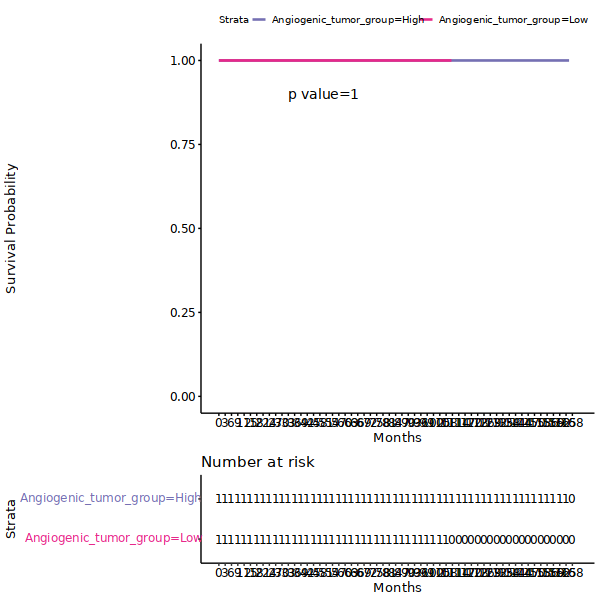

In [426]:
surv_obj <- Surv(time = lung_sample_tbl$Dx_to_death_or_last_fu_months, event = lung_sample_tbl$'Vital_status')

# Fit a survival curve
fit <- survfit(surv_obj ~ Angiogenic_tumor_group, data = lung_sample_tbl)

surv_diff <- survdiff(surv_obj ~ Angiogenic_tumor_group, data = lung_sample_tbl)
p_value <- round(1 - pchisq(surv_diff$chisq, df = 1), 2)

surv_plot <- ggsurvplot(fit, 
                        data = lung_sample_tbl, 
                        palette = c("#7570B3", "#E7298A"),
                        xlab = "Months",
                        ylab = "Survival Probability",
                        #xlim = c(24, 36),
                        break.x.by = 3,    
                        #ggtheme = theme_minimal(),
                        censor = FALSE,
                        risk.table = TRUE,
                        pval = paste0("p value=", p_value),
                        pval.coord = c(33, 0.9)  
                       )

set_size(6,6)
surv_plot

Warning message in pchisq(chi, df, lower.tail = FALSE):
“NaNs produced”


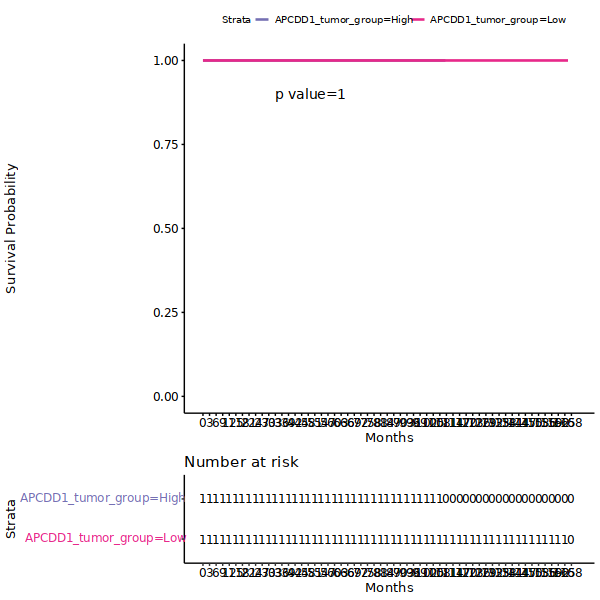

In [427]:
surv_obj <- Surv(time = lung_sample_tbl$Dx_to_death_or_last_fu_months, event = lung_sample_tbl$'Vital_status')

# Fit a survival curve
fit <- survfit(surv_obj ~ APCDD1_tumor_group, data = lung_sample_tbl)

surv_diff <- survdiff(surv_obj ~ APCDD1_tumor_group, data = lung_sample_tbl)
p_value <- round(1 - pchisq(surv_diff$chisq, df = 1), 2)

surv_plot <- ggsurvplot(fit, 
                        data = lung_sample_tbl, 
                        palette = c("#7570B3", "#E7298A"),
                        xlab = "Months",
                        ylab = "Survival Probability",
                        #xlim = c(24, 36),
                        break.x.by = 3,    
                        #ggtheme = theme_minimal(),
                        censor = FALSE,
                        risk.table = TRUE,
                        pval = paste0("p value=", p_value),
                        pval.coord = c(33, 0.9)  
                       )

set_size(6,6)
surv_plot

#### primary

##### Angiogenic_tumor_group

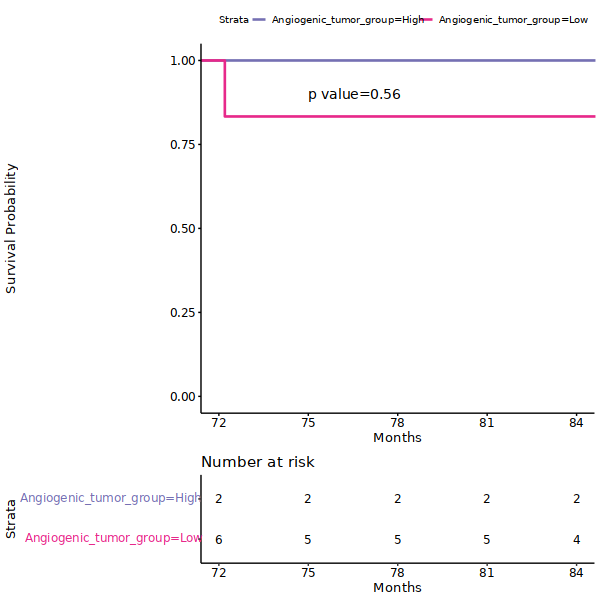

In [436]:
# Prepare your survival object
surv_obj <- Surv(time = primary_sample_tbl$Dx_to_death_or_last_fu_months, event = primary_sample_tbl$'Vital_status')

# Fit a survival curve
fit <- survfit(surv_obj ~ Angiogenic_tumor_group, data = primary_sample_tbl)

surv_diff <- survdiff(surv_obj ~ Angiogenic_tumor_group, data = primary_sample_tbl)
p_value <- round(1 - pchisq(surv_diff$chisq, df = 1), 2)

surv_plot <- ggsurvplot(fit, 
                        data = primary_sample_tbl, 
                        palette = c("#7570B3", "#E7298A"),
                        xlab = "Months",
                        ylab = "Survival Probability",
                        xlim = c(72, 84),
                        break.x.by = 3,    
                        #ggtheme = theme_minimal(),
                        censor = FALSE,
                        risk.table = TRUE,
                        pval = paste0("p value=", p_value),
                        pval.coord = c(75, 0.9)  
                       )

set_size(6,6)
surv_plot

##### APCDD1_tumor_group

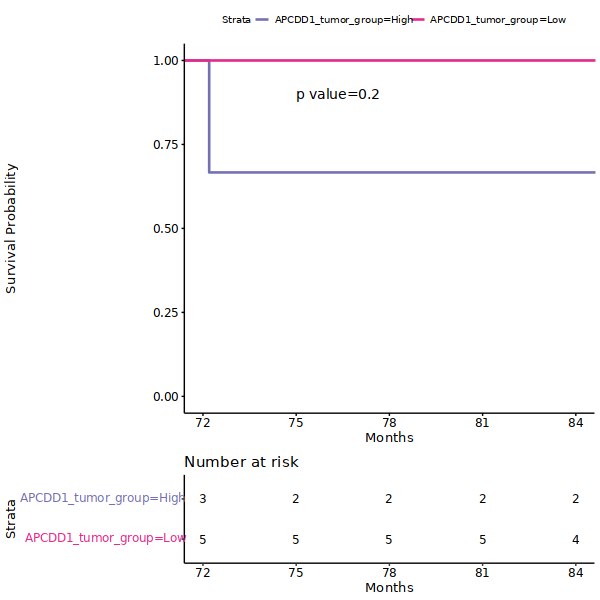

In [435]:
# Prepare your survival object
surv_obj <- Surv(time = primary_sample_tbl$Dx_to_death_or_last_fu_months, event = primary_sample_tbl$'Vital_status')

# Fit a survival curve
fit <- survfit(surv_obj ~ APCDD1_tumor_group, data = primary_sample_tbl)

surv_diff <- survdiff(surv_obj ~ APCDD1_tumor_group, data = primary_sample_tbl)
p_value <- round(1 - pchisq(surv_diff$chisq, df = 1), 2)

surv_plot <- ggsurvplot(fit, 
                        data = primary_sample_tbl, 
                        palette = c("#7570B3", "#E7298A"),
                        xlab = "Months",
                        ylab = "Survival Probability",
                        xlim = c(72, 84),
                        break.x.by = 3,    
                        #ggtheme = theme_minimal(),
                        censor = FALSE,
                        risk.table = TRUE,
                        pval = paste0("p value=", p_value),
                        pval.coord = c(75, 0.9)  
                       )

set_size(6,6)
surv_plot

##### Proliferative_tumor_group

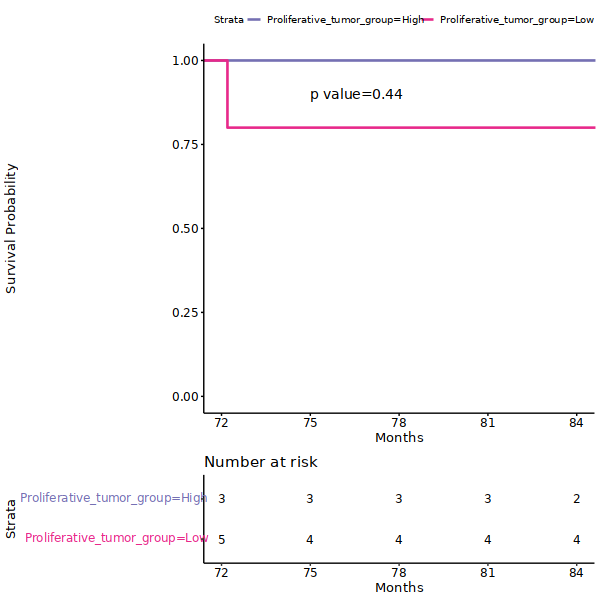

In [434]:
# Prepare your survival object
surv_obj <- Surv(time = primary_sample_tbl$Dx_to_death_or_last_fu_months, event = primary_sample_tbl$'Vital_status')

# Fit a survival curve
fit <- survfit(surv_obj ~ Proliferative_tumor_group, data = primary_sample_tbl)

surv_diff <- survdiff(surv_obj ~ Proliferative_tumor_group, data = primary_sample_tbl)
p_value <- round(1 - pchisq(surv_diff$chisq, df = 1), 2)

surv_plot <- ggsurvplot(fit, 
                        data = primary_sample_tbl, 
                        palette = c("#7570B3", "#E7298A"),
                        xlab = "Months",
                        ylab = "Survival Probability",
                        xlim = c(72, 84),
                        break.x.by = 3,    
                        #ggtheme = theme_minimal(),
                        censor = FALSE,
                        risk.table = TRUE,
                        pval = paste0("p value=", p_value),
                        pval.coord = c(75, 0.9)  
                       )

set_size(6,6)
surv_plot

##### Proliferative_stem_tumor_group

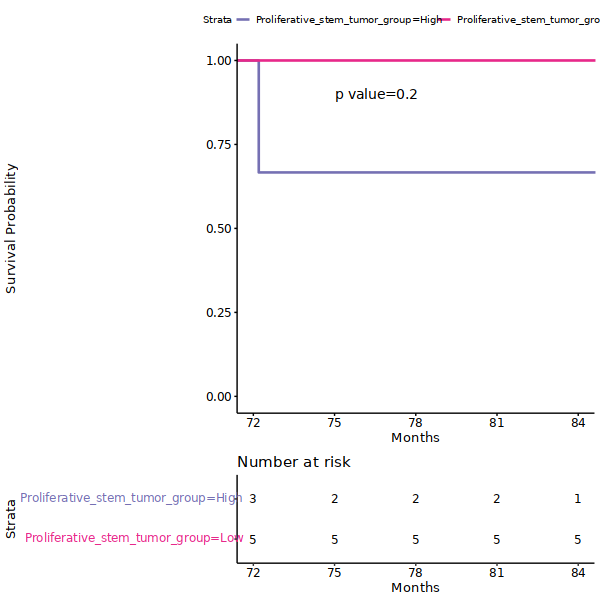

In [433]:
# Prepare your survival object
surv_obj <- Surv(time = primary_sample_tbl$Dx_to_death_or_last_fu_months, event = primary_sample_tbl$'Vital_status')

# Fit a survival curve
fit <- survfit(surv_obj ~ Proliferative_stem_tumor_group, data = primary_sample_tbl)

surv_diff <- survdiff(surv_obj ~ Proliferative_stem_tumor_group, data = primary_sample_tbl)
p_value <- round(1 - pchisq(surv_diff$chisq, df = 1), 2)

surv_plot <- ggsurvplot(fit, 
                        data = primary_sample_tbl, 
                        palette = c("#7570B3", "#E7298A"),
                        xlab = "Months",
                        ylab = "Survival Probability",
                        xlim = c(72, 84),
                        break.x.by = 3,    
                        #ggtheme = theme_minimal(),
                        censor = FALSE,
                        risk.table = TRUE,
                        pval = paste0("p value=", p_value),
                        pval.coord = c(75, 0.9)  
                       )

set_size(6,6)
surv_plot

##### Stem_like_tumor_group

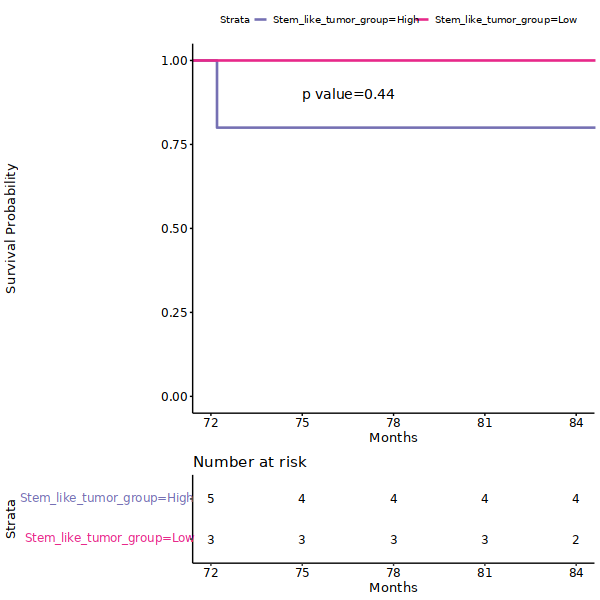

In [438]:
# Prepare your survival object
surv_obj <- Surv(time = primary_sample_tbl$Dx_to_death_or_last_fu_months, event = primary_sample_tbl$'Vital_status')

# Fit a survival curve
fit <- survfit(surv_obj ~ Stem_like_tumor_group, data = primary_sample_tbl)

surv_diff <- survdiff(surv_obj ~ Stem_like_tumor_group, data = primary_sample_tbl)
p_value <- round(1 - pchisq(surv_diff$chisq, df = 1), 2)

surv_plot <- ggsurvplot(fit, 
                        data = primary_sample_tbl, 
                        palette = c("#7570B3", "#E7298A"),
                        xlab = "Months",
                        ylab = "Survival Probability",
                        xlim = c(72, 84),
                        break.x.by = 3,    
                        #ggtheme = theme_minimal(),
                        censor = FALSE,
                        risk.table = TRUE,
                        pval = paste0("p value=", p_value),
                        pval.coord = c(75, 0.9)  
                       )

set_size(6,6)
surv_plot